## seaborn

In [1]:
import anndata as ad
import numpy as np

In [2]:
import sys
import os

# Define the path to the main folder
main_folder = "/Users/apple/Desktop/KB/SCSeq_LineageBarcoding2/SCSeq_LineageBarcoding/SCLineage_ConstrativeLearning/main"

# Add it to sys.path
sys.path.append(main_folder)

import LCL_eval

In [3]:
input_dir = "/Users/apple/Desktop/KB/data"

train_005 = np.load(input_dir+'/feat_LCL_2025/Larry_top200/feat_0204_Larry_top200_sf005/scBaseEncoderFeat_Z_bs150_tau0.5.npy')
test_005 = np.load(input_dir+'/feat_LCL_2025/Larry_top200/feat_0204_Larry_top200_sf005/test_embedding.npy')

train_01 = np.load(input_dir+'/feat_LCL_2025/Larry_top200/feat_0204_Larry_top200_sf01/scBaseEncoderFeat_Z_bs150_tau0.5.npy')
test_01 = np.load(input_dir+'/feat_LCL_2025/Larry_top200/feat_0204_Larry_top200_sf01/test_embedding.npy')

train_02 = np.load(input_dir+'/feat_LCL_2025/Larry_top200/feat_0204_Larry_top200_sf02/scBaseEncoderFeat_Z_bs150_tau0.5.npy')
test_02 = np.load(input_dir+'/feat_LCL_2025/Larry_top200/feat_0204_Larry_top200_sf02/test_embedding.npy')

train_04 = np.load(input_dir+'/feat_LCL_2025/Larry_top200/feat_0204_Larry_top200_sf04/scBaseEncoderFeat_Z_bs150_tau0.5.npy')
test_04 = np.load(input_dir+'/feat_LCL_2025/Larry_top200/feat_0204_Larry_top200_sf04/test_embedding.npy')

train_06 = np.load(input_dir+'/feat_LCL_2025/Larry_top200/feat_0204_Larry_top200_sf06/scBaseEncoderFeat_Z_bs150_tau0.5.npy')
test_06 = np.load(input_dir+'/feat_LCL_2025/Larry_top200/feat_0204_Larry_top200_sf06/test_embedding.npy')

train_08 = np.load(input_dir+'/feat_LCL_2025/Larry_top200/feat_0204_Larry_top200_sf08/scBaseEncoderFeat_Z_bs150_tau0.5.npy')
test_08 = np.load(input_dir+'/feat_LCL_2025/Larry_top200/feat_0204_Larry_top200_sf08/test_embedding.npy')

adata_train = ad.read_h5ad(input_dir+'/LarryData/train_test/Larry_200_train.h5ad')
adata_test = ad.read_h5ad(input_dir+'/LarryData/train_test/Larry_200_test.h5ad')

In [4]:
train_08.shape,test_08.shape

((10148, 64), (1225, 64))

In [8]:
embed_08 = np.concatenate((train_08, test_08), axis=0)
embed_08.shape

(11373, 64)

In [13]:
adata_train.obs["label"] = "train"
adata_test.obs["label"] = "test"
adata = ad.concat([adata_train, adata_test], axis=0, join='outer')

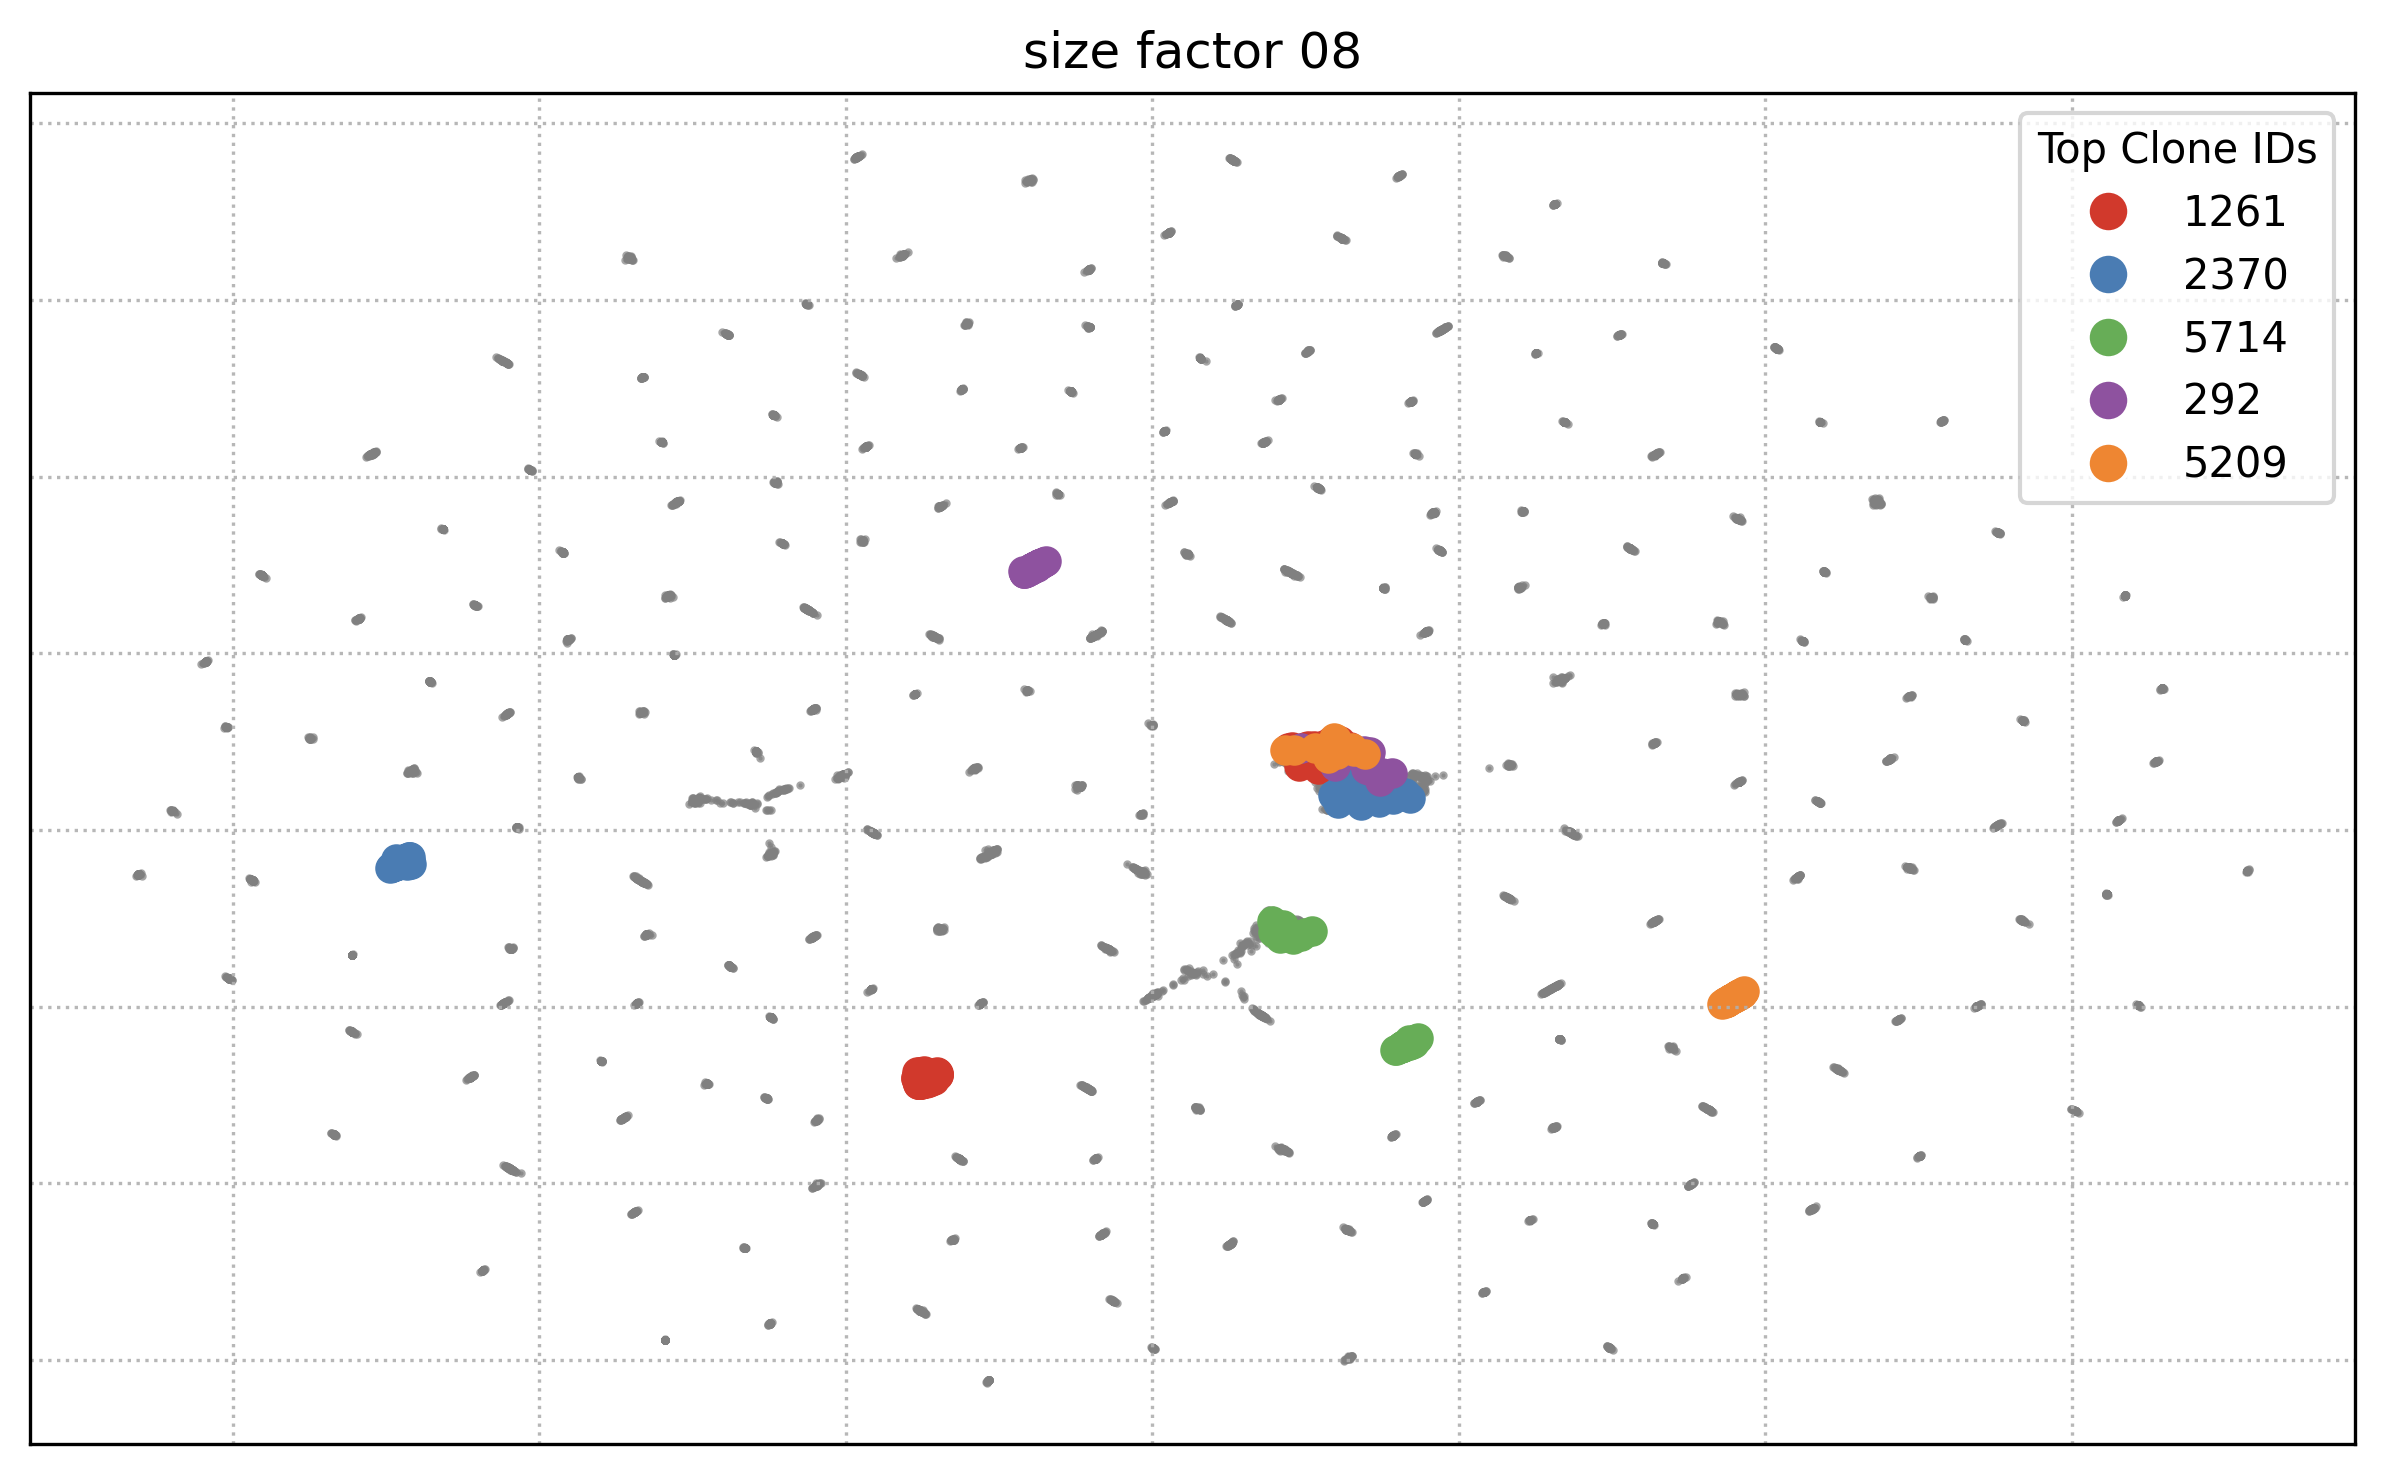

In [10]:
eval_08_embed = LCL_eval.Eval(embed_08, adata)
eval_08_embed.plot_umap_top_lin("size factor 08")

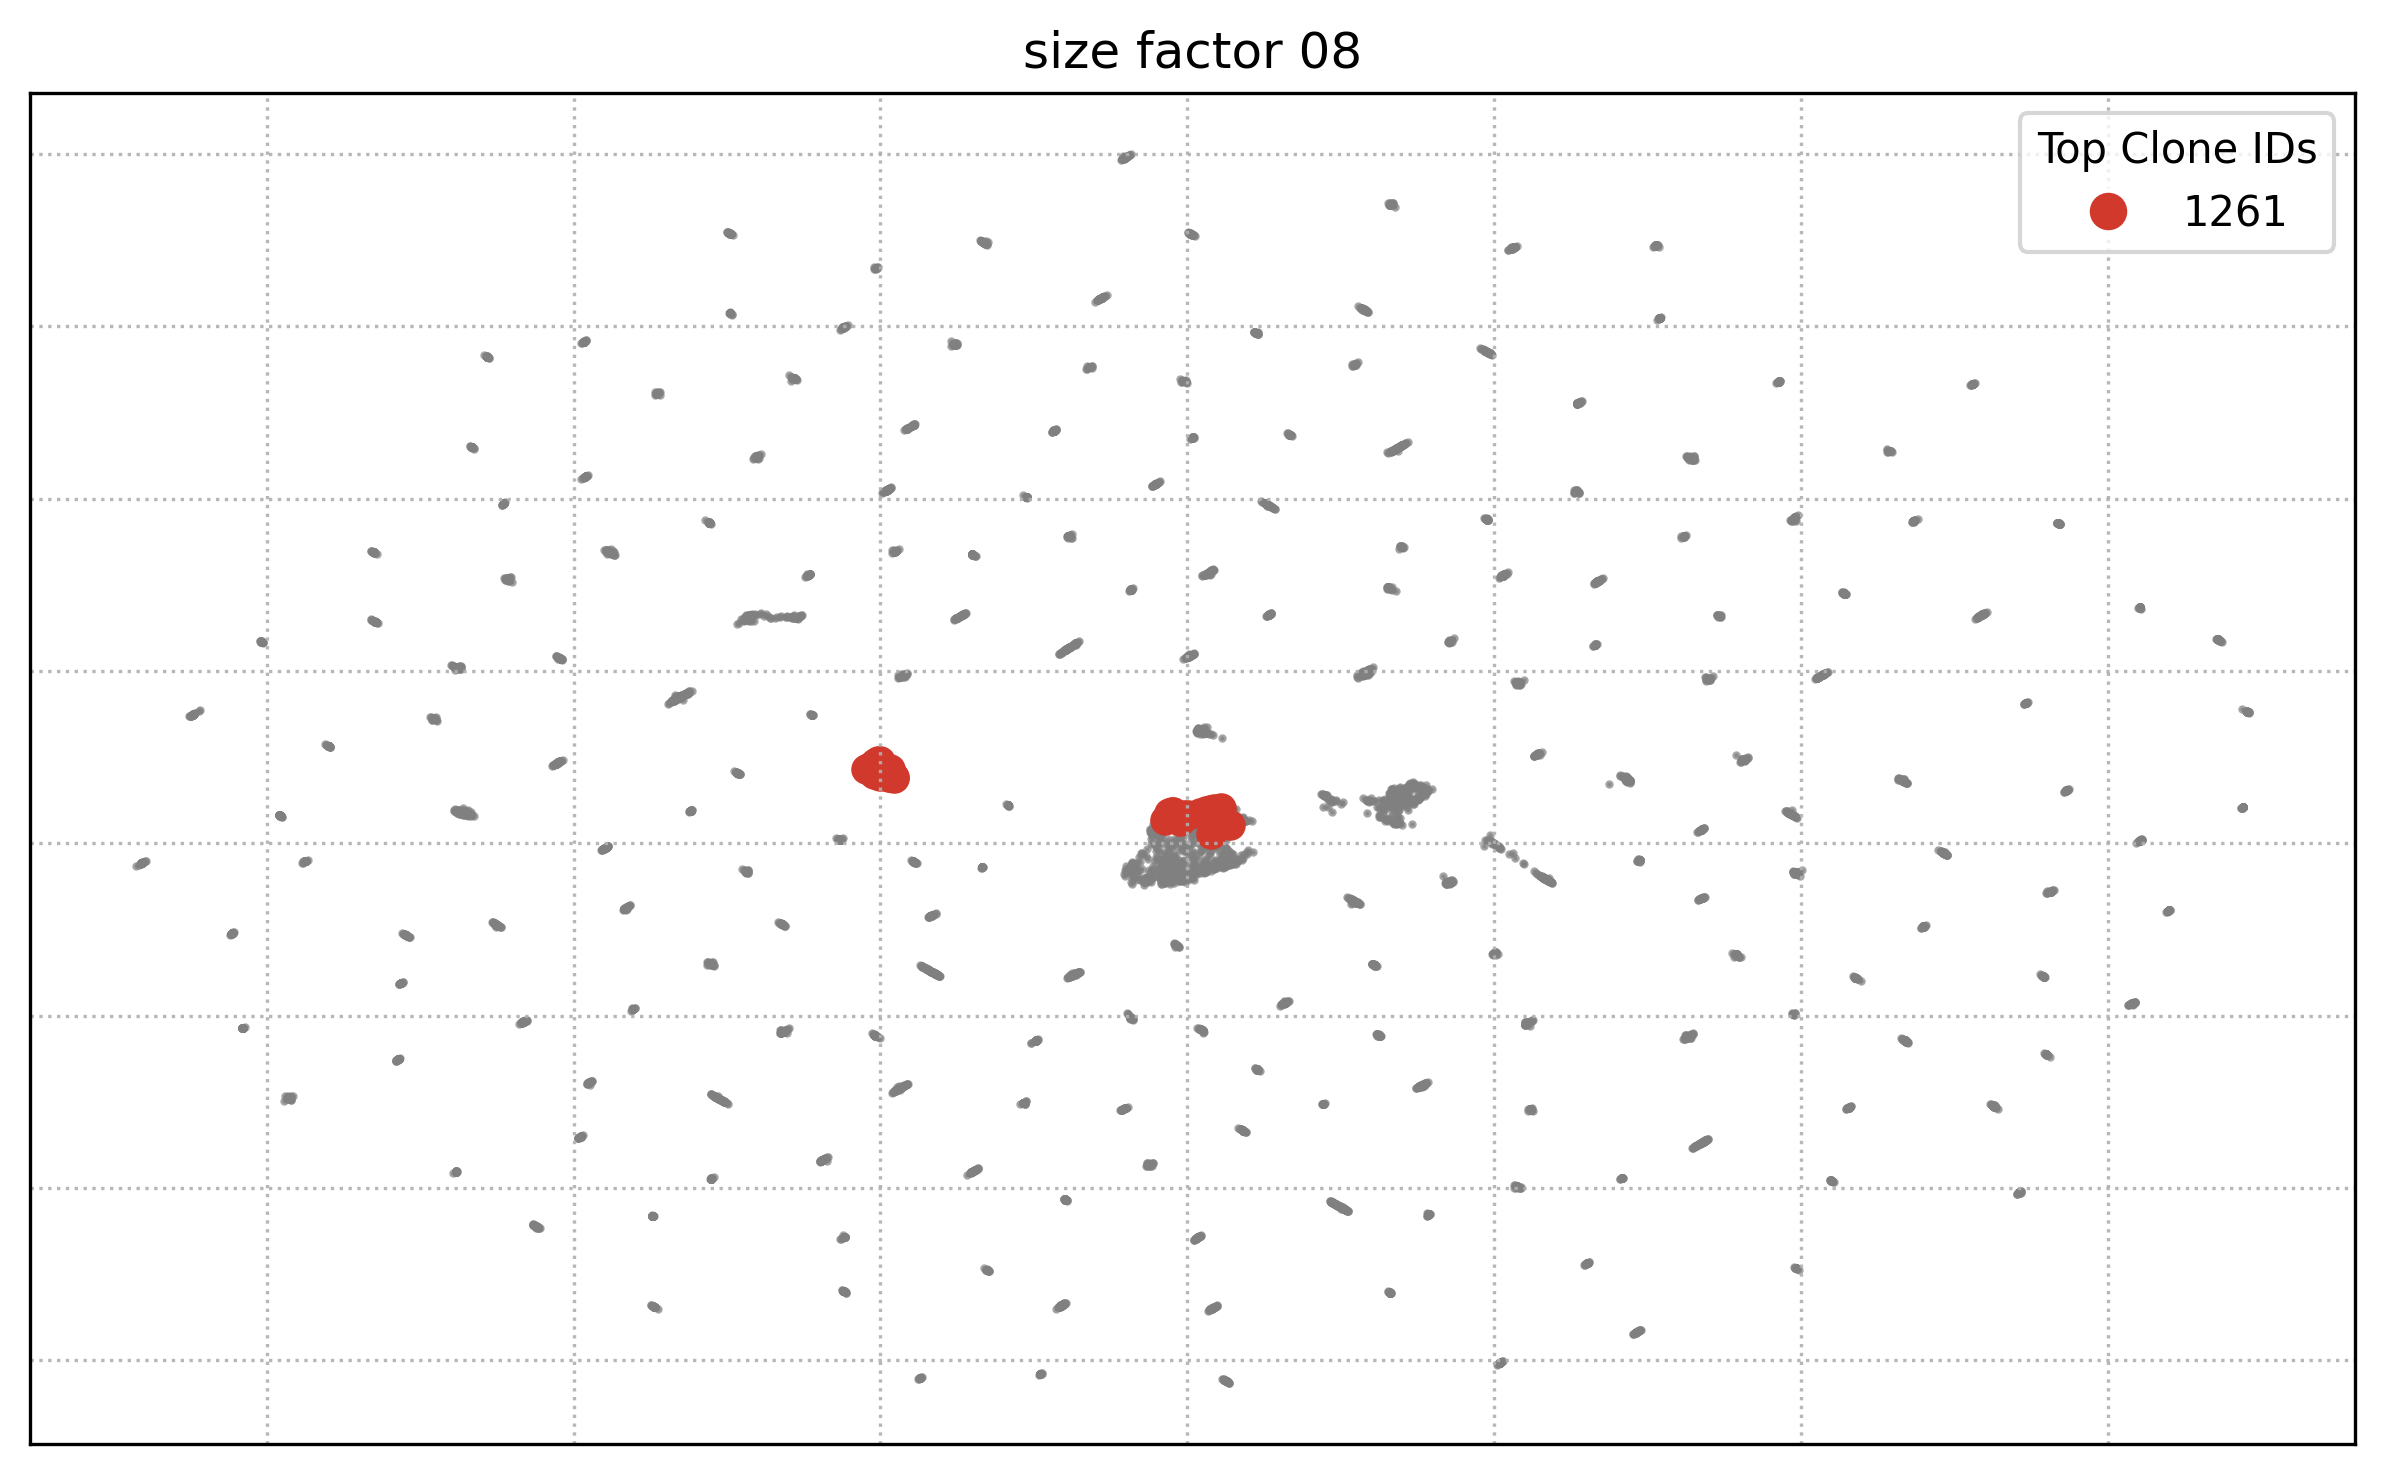

In [12]:

eval_08_embed = LCL_eval.Eval(embed_08, adata, num_top_clone_ids=1)
eval_08_embed.plot_umap_top_lin("size factor 08")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_umap(adata, train_key="train", test_key="test", colormap="viridis"):
    """
    Plots UMAP embedding of an AnnData object, distinguishing train and test points.
    
    Parameters:
    - adata: AnnData object containing UMAP coordinates in `adata.obsm["X_umap"]`
    - train_key: The label in `adata.obs["dataset"]` that corresponds to the training set
    - test_key: The label in `adata.obs["dataset"]` that corresponds to the test set
    - colormap: The colormap for visualization
    """
    umap = adata.obsm["X_umap"]
    
    # Extract train and test points
    train_idx = adata.obs["dataset"] == train_key
    test_idx = adata.obs["dataset"] == test_key

    plt.figure(figsize=(8, 6))
    
    # Plot train points as dots
    plt.scatter(umap[train_idx, 0], umap[train_idx, 1], 
                c=adata[train_idx].obs["label"].astype(float), 
                cmap=colormap, s=10, marker=".", alpha=0.7, label="Train")
    
    # Plot test points as crosses
    plt.scatter(umap[test_idx, 0], umap[test_idx, 1], 
                c=adata[test_idx].obs["label"].astype(float), 
                cmap=colormap, s=30, marker="x", alpha=0.9, label="Test")

    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.title("UMAP Projection")
    plt.colorbar(label="Label")
    plt.legend()
    plt.show()

In [35]:
import umap
reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(embed_08)
adata.obsm["X_umap"] = embedding_umap 

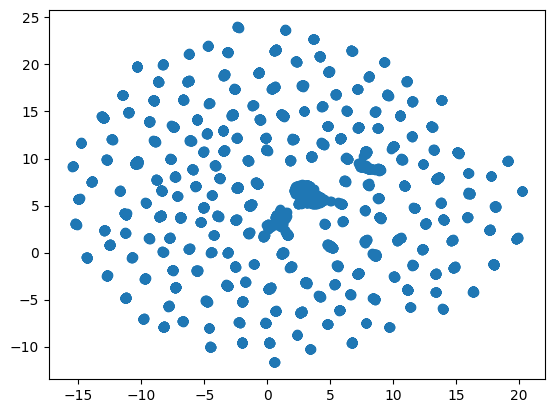

In [39]:
plt.scatter(embedding_umap[:,0],embedding_umap[:,1])

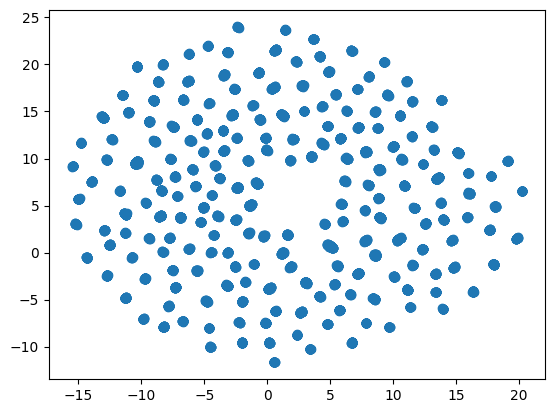

In [41]:
plt.scatter(embedding_umap[:10147,0],embedding_umap[:10147,1])

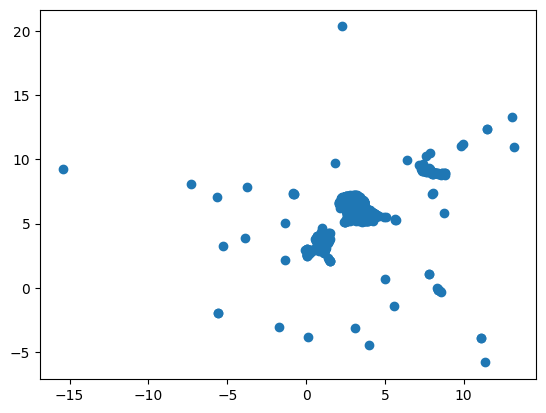

In [42]:
plt.scatter(embedding_umap[10148:,0],embedding_umap[10148:,1])

In [40]:
train_08.shape, test_08.shape

((10148, 64), (1225, 64))

In [22]:

import pandas as pd

# Ensure adata.obs is initialized
if adata.obs.empty:
    adata.obs = pd.DataFrame(index=adata.obs_names)

# Create dataset labels
n_train = train_08.shape[0]
n_test = test_08.shape[0]

# Check if total matches
assert embed_08.shape[0] == (n_train + n_test), "Mismatch in dataset sizes!"

# Assign dataset labels
adata.obs["dataset"] = ["train"] * n_train + ["test"] * n_test

# Verify dataset labels exist
print(adata.obs.head())

                              Library       Cell barcode  time_info  \
LK_d6_2_2:TCAGCCTCAAGGTAAT  LK_d6_2_2  TCAGCCTC-AAGGTAAT        6.0   
LK_d6_1_1:ACCTTCCCAAGTAATC  LK_d6_1_1  ACCTTCCC-AAGTAATC        6.0   
LK_d6_1_1:CAATCTAGAGATGGCT  LK_d6_1_1  CAATCTAG-AGATGGCT        6.0   
LK_d6_2_2:GATGTGGCATCTTTGT  LK_d6_2_2  GATGTGGC-ATCTTTGT        6.0   
LK_d6_1_1:GGACTTCTCGAATAAT  LK_d6_1_1  GGACTTCT-CGAATAAT        6.0   

                           Starting population  state_info  Well  SPRING-x  \
LK_d6_2_2:TCAGCCTCAAGGTAAT       Lin-Kit+Sca1-  Neutrophil     2  2367.886   
LK_d6_1_1:ACCTTCCCAAGTAATC       Lin-Kit+Sca1-  Neutrophil     1  2096.274   
LK_d6_1_1:CAATCTAGAGATGGCT       Lin-Kit+Sca1-  Neutrophil     1  2444.457   
LK_d6_2_2:GATGTGGCATCTTTGT       Lin-Kit+Sca1-    Monocyte     2  2842.208   
LK_d6_1_1:GGACTTCTCGAATAAT       Lin-Kit+Sca1-  Neutrophil     1  2373.881   

                            SPRING-y  Time point  clone_id  n_genes  label  \
LK_d6_2_2:TCAGCCTCAAGGTAAT

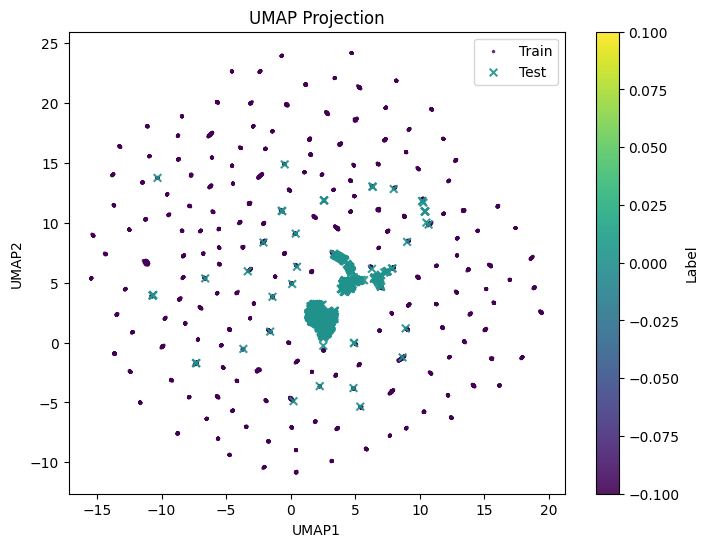

In [27]:
adata.obs["label"] = adata.obs["label"].astype("category").cat.codes
plot_umap(adata)

In [33]:
import matplotlib.pyplot as plt

def plot_umap(adata, train_key="train", test_key="test", colormap="tab10"):
    """
    Plots UMAP with top 5 clones uniquely colored and others grouped.
    
    Parameters:
    - adata: AnnData object with UMAP coordinates in `adata.obsm["X_umap"]`
    - train_key: Label for train data in `adata.obs["dataset"]`
    - test_key: Label for test data in `adata.obs["dataset"]`
    - colormap: Colormap for visualization
    """
    umap = adata.obsm["X_umap"]
    
    train_idx = adata.obs["dataset"] == train_key
    test_idx = adata.obs["dataset"] == test_key

    plt.figure(figsize=(8, 6))

    # Assign a unique color for top 5 clones, gray for "Other"
    unique_clones = adata.obs["clone_id"].cat.categories
    colors = plt.get_cmap(colormap)(range(len(unique_clones)))  # Use a discrete colormap
    color_map = dict(zip(unique_clones, colors))

    # Scatter plot for train points
    for clone in unique_clones:
        idx = (adata.obs["clone_id"] == clone) & train_idx
        plt.scatter(umap[idx, 0], umap[idx, 1], color=color_map[clone], s=10, marker=".", label=f"Train {clone}")

    # Scatter plot for test points (cross markers)
    for clone in unique_clones:
        idx = (adata.obs["clone_id"] == clone) & test_idx
        plt.scatter(umap[idx, 0], umap[idx, 1], color=color_map[clone], s=30, marker="x", label=f"Test {clone}")

    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.title("UMAP Projection - Top 5 Clones")
    plt.legend()
    plt.show()

In [34]:
plot_umap(adata)

AttributeError: Can only use .cat accessor with a 'category' dtype

<Figure size 800x600 with 0 Axes>

### Train 

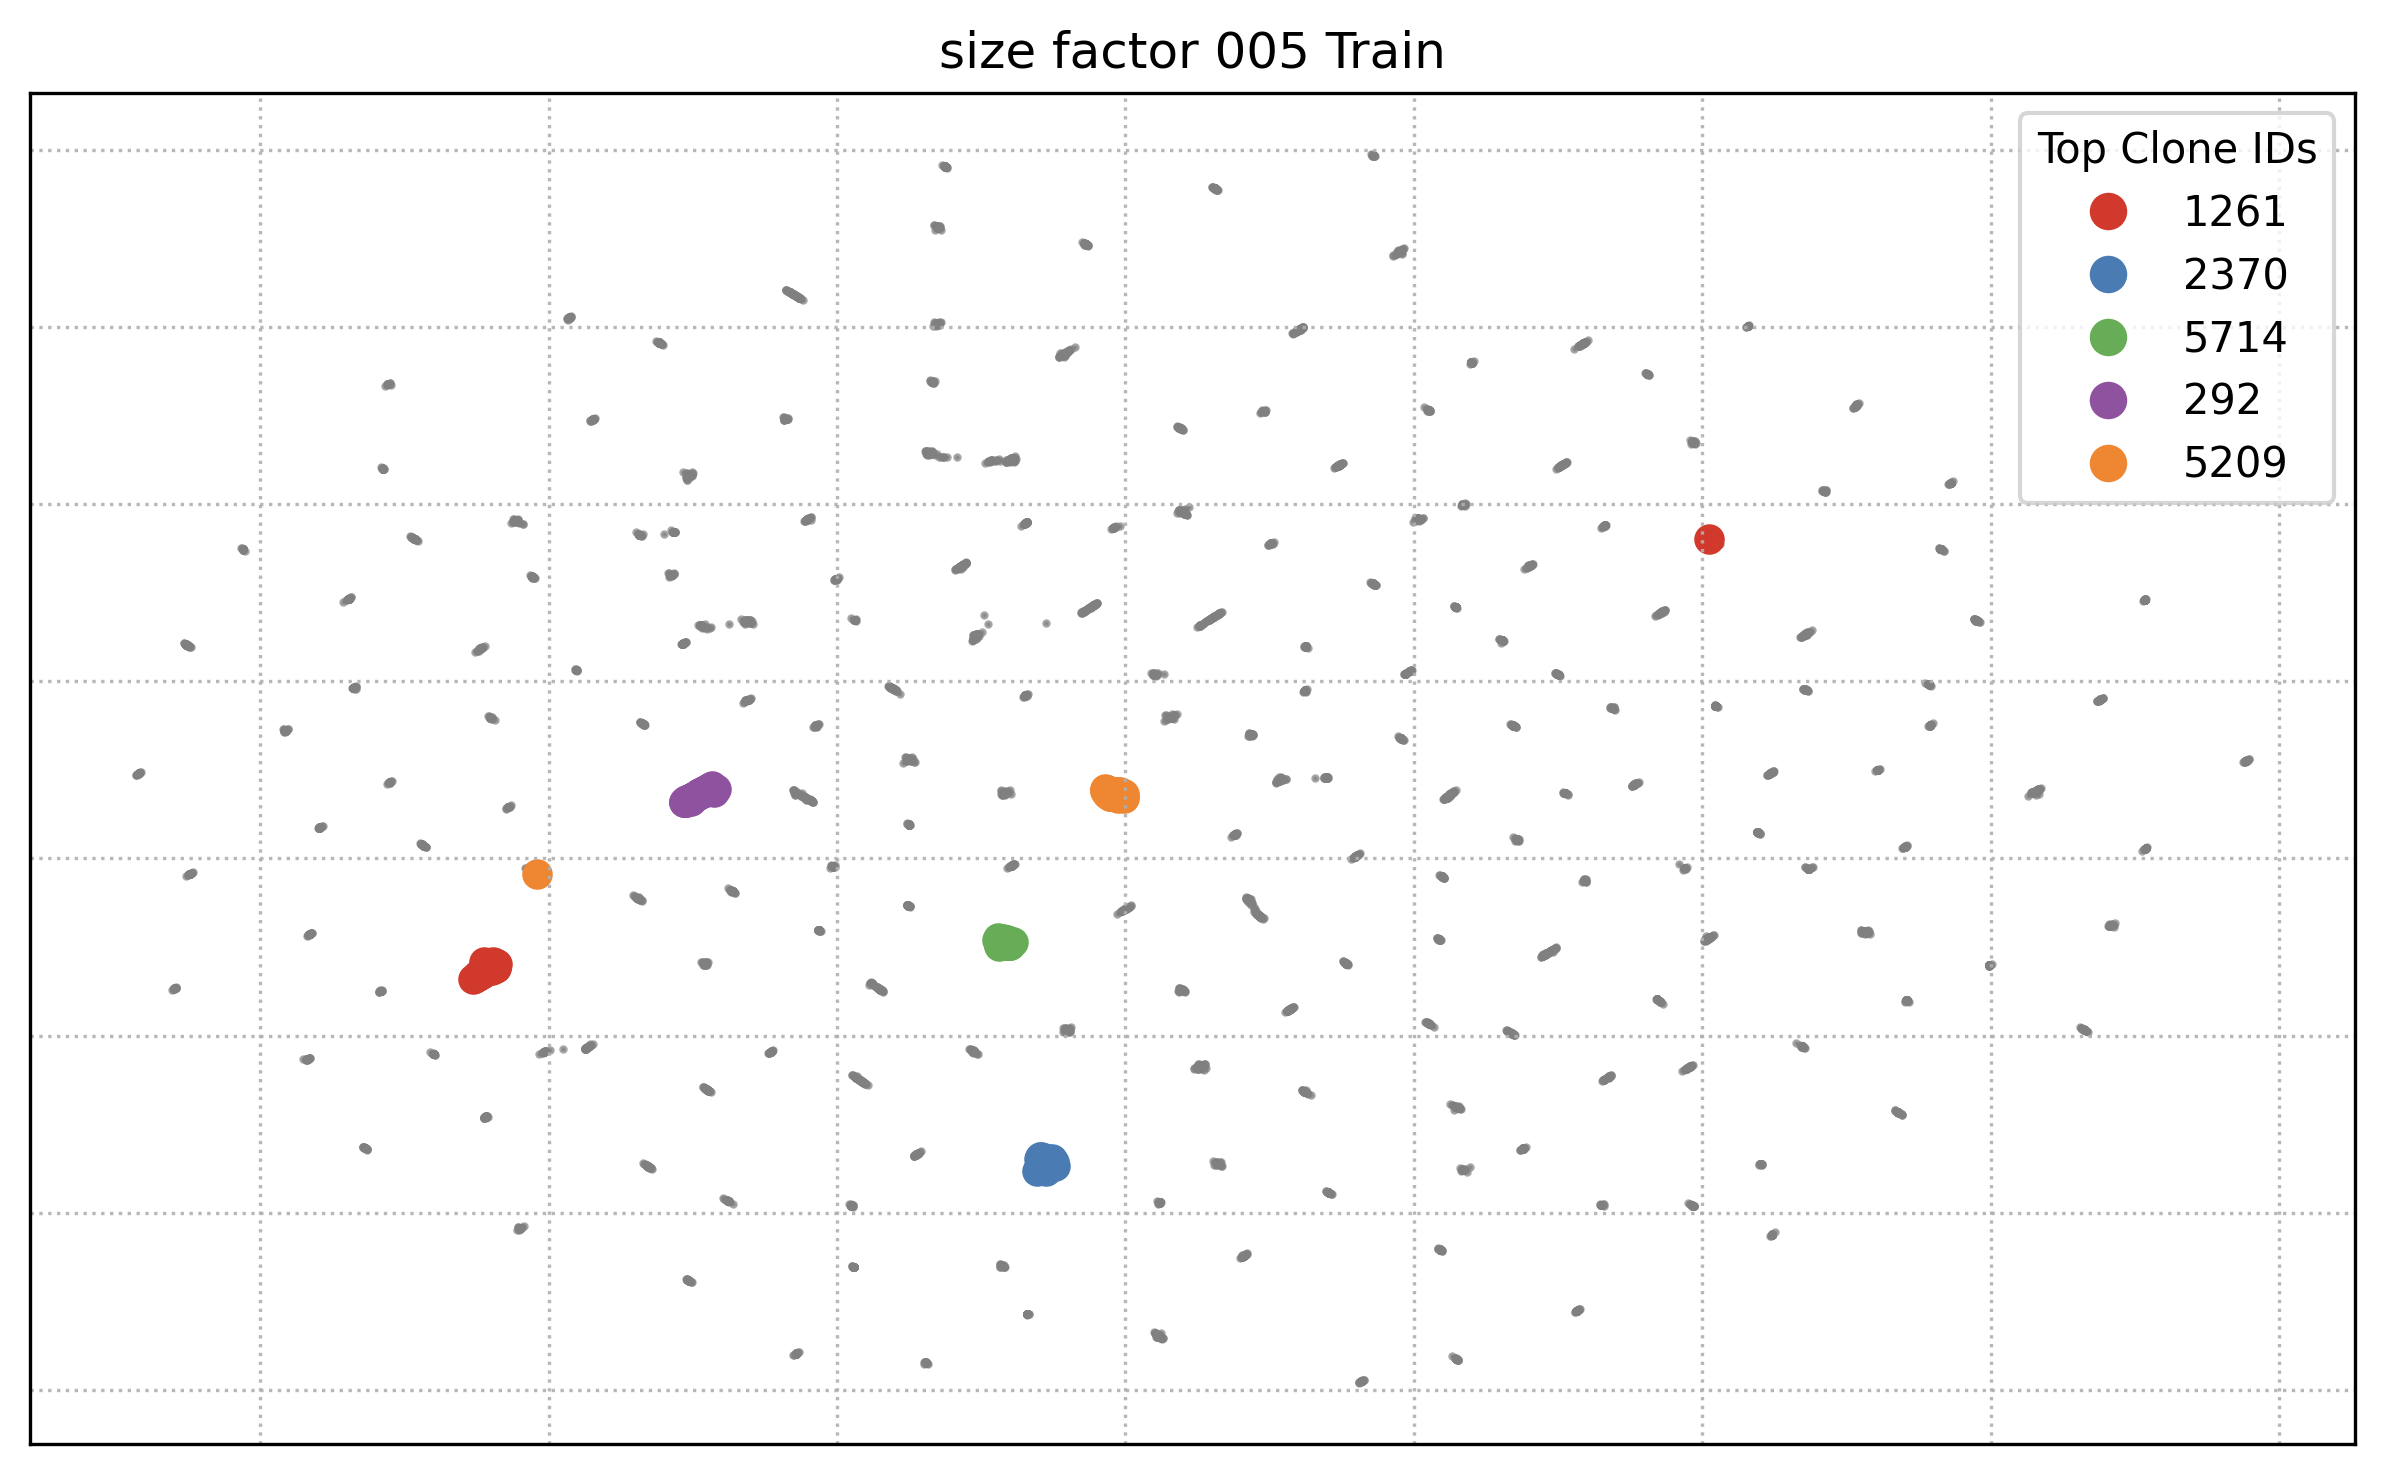

KNN classifier training accuracy: 99.56%
Calinski-Harabasz Score: 421.4221393312751


In [13]:
eval_005_train = LCL_eval.Eval(train_005, adata_train)
eval_005_train.plot_umap_top_lin("size factor 005 Train")
eval_005_train.KNN_train()
score_005_train = eval_005_train.calculate_calinski_harabasz_score()

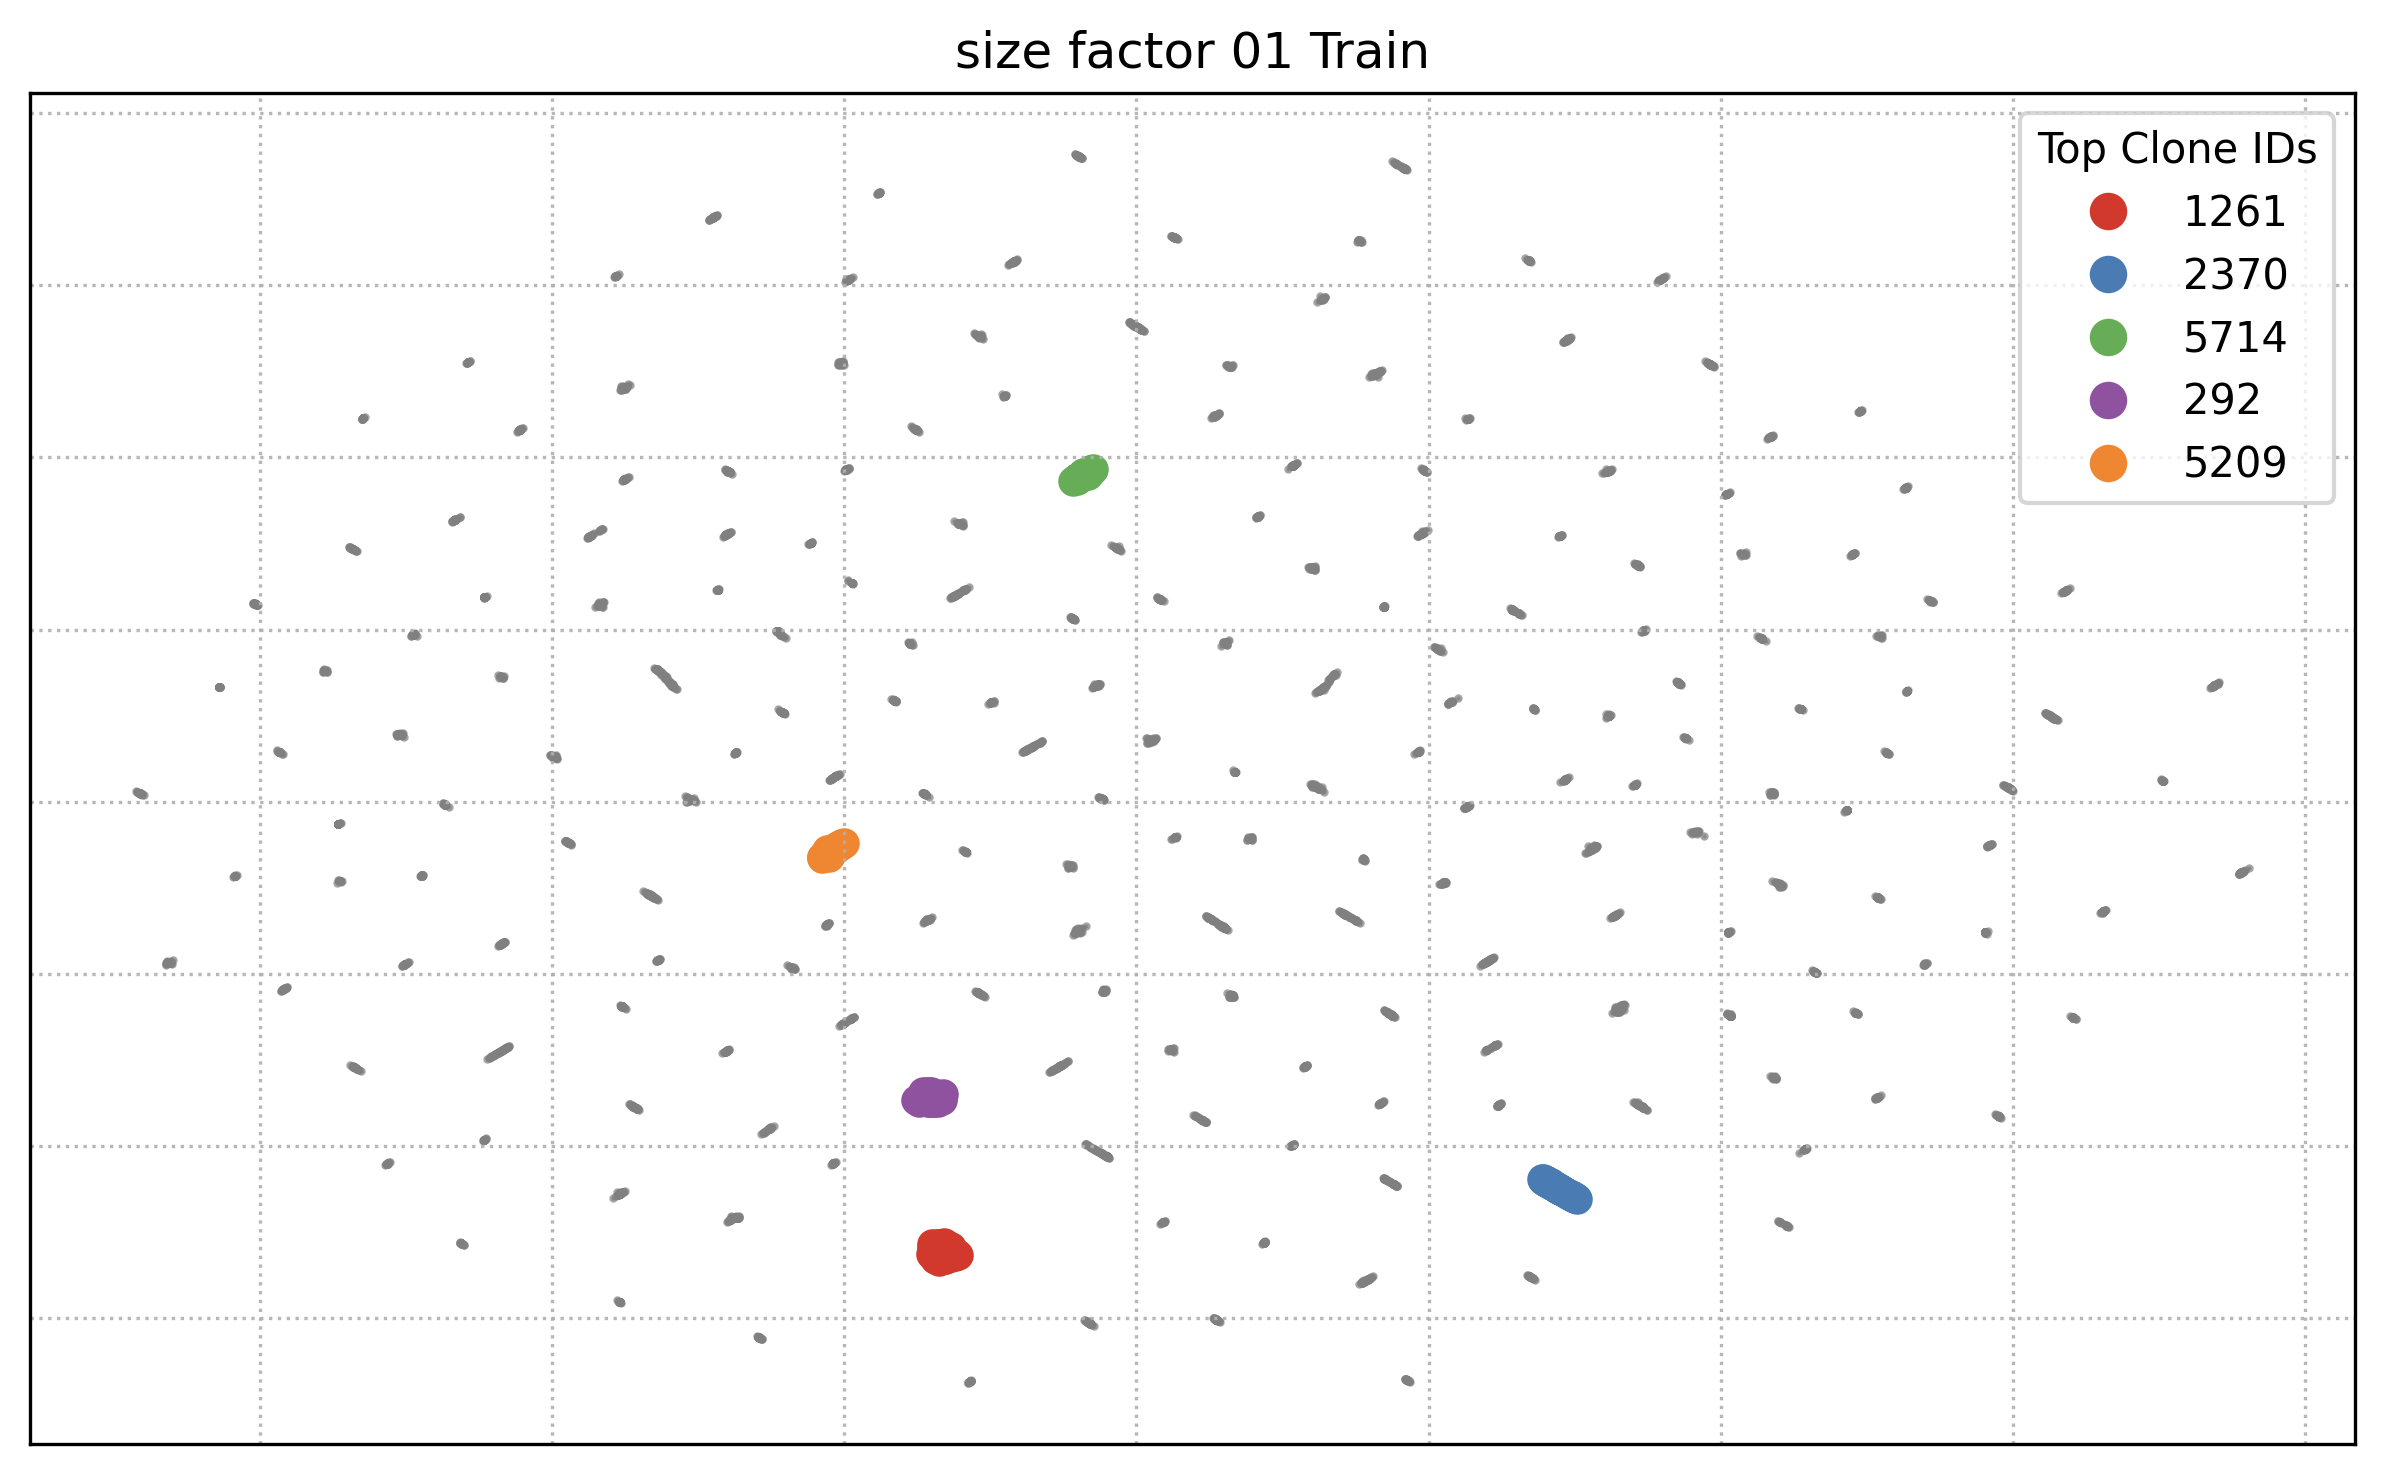

KNN classifier training accuracy: 100.00%
Calinski-Harabasz Score: 1860.540294596468


In [14]:
eval_01_train = LCL_eval.Eval(train_01, adata_train)
eval_01_train.plot_umap_top_lin("size factor 01 Train")
eval_01_train.KNN_train()
score_01_train = eval_01_train.calculate_calinski_harabasz_score()

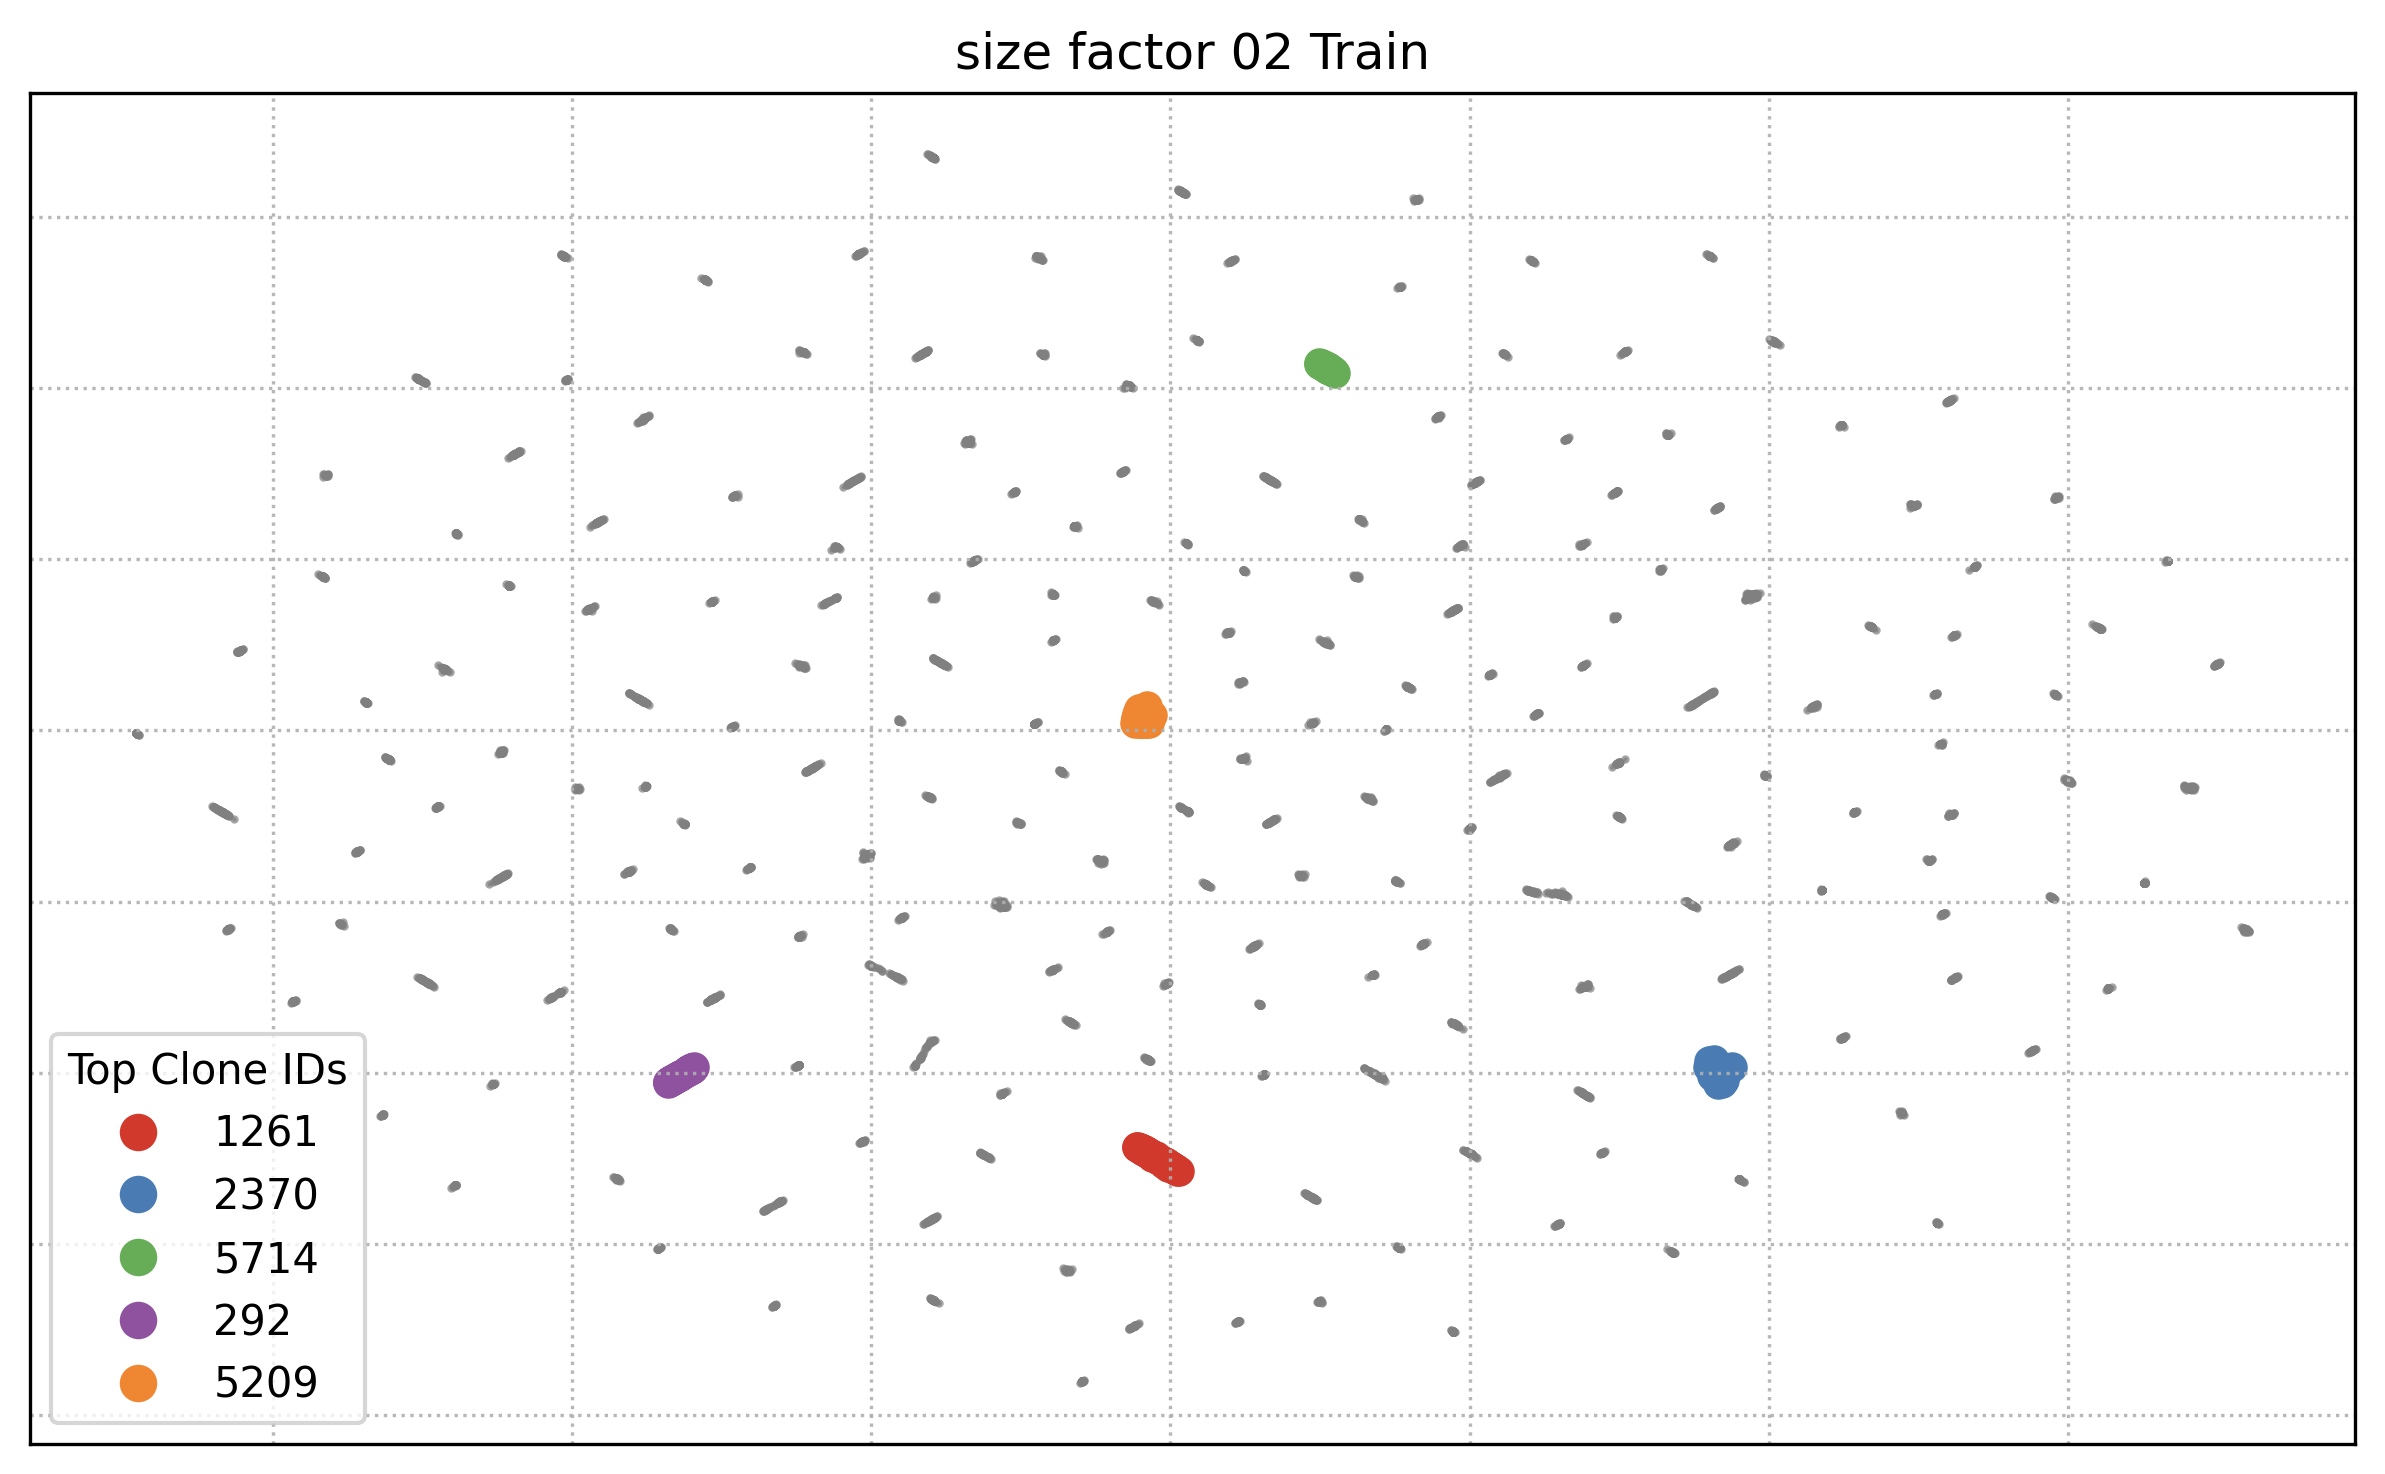

KNN classifier training accuracy: 100.00%
Calinski-Harabasz Score: 7823.528751708437


/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [5]:
eval_02_train = LCL_eval.Eval(train_02, adata_train)
eval_02_train.plot_umap_top_lin("size factor 02 Train")
eval_02_train.KNN_train()
score_02_train = eval_02_train.calculate_calinski_harabasz_score()

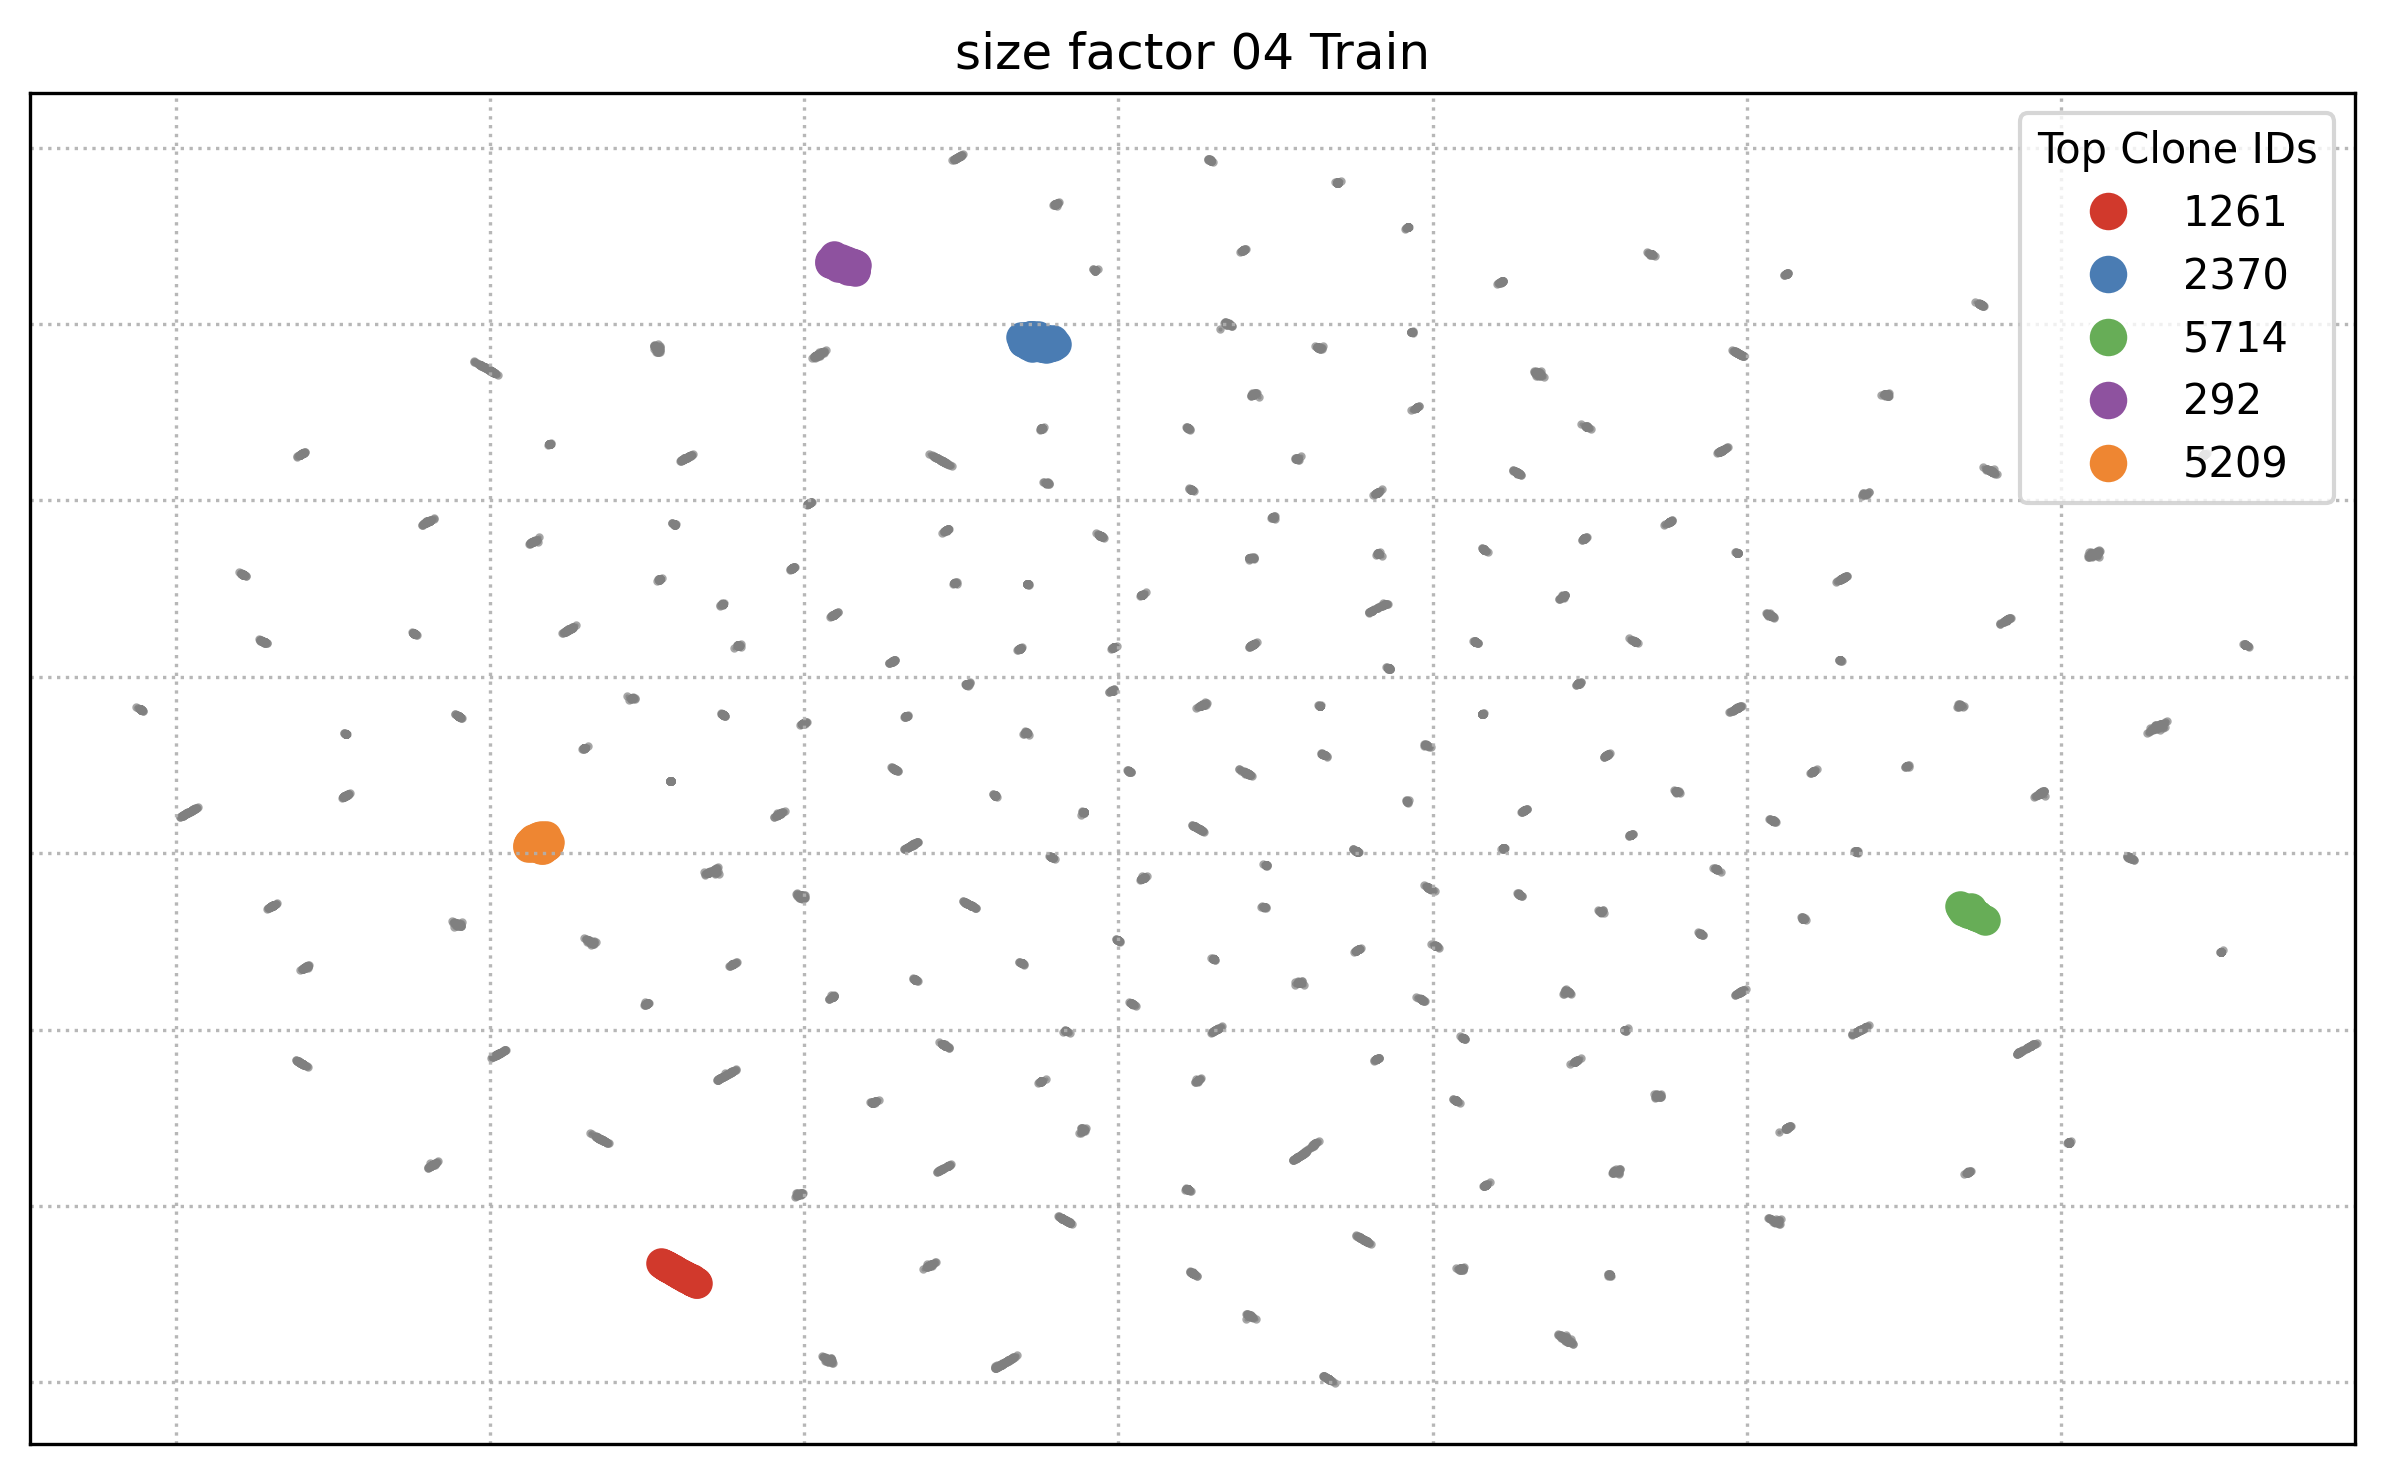

Calinski-Harabasz Score: 21052.318133680554
KNN classifier training accuracy: 100.00%


1.0

In [5]:
eval_04_train = LCL_eval.Eval(train_04, adata_train)
eval_04_train.plot_umap_top_lin("size factor 04 Train")
score_04_train = eval_04_train.calculate_calinski_harabasz_score()
eval_04_train.KNN_train()


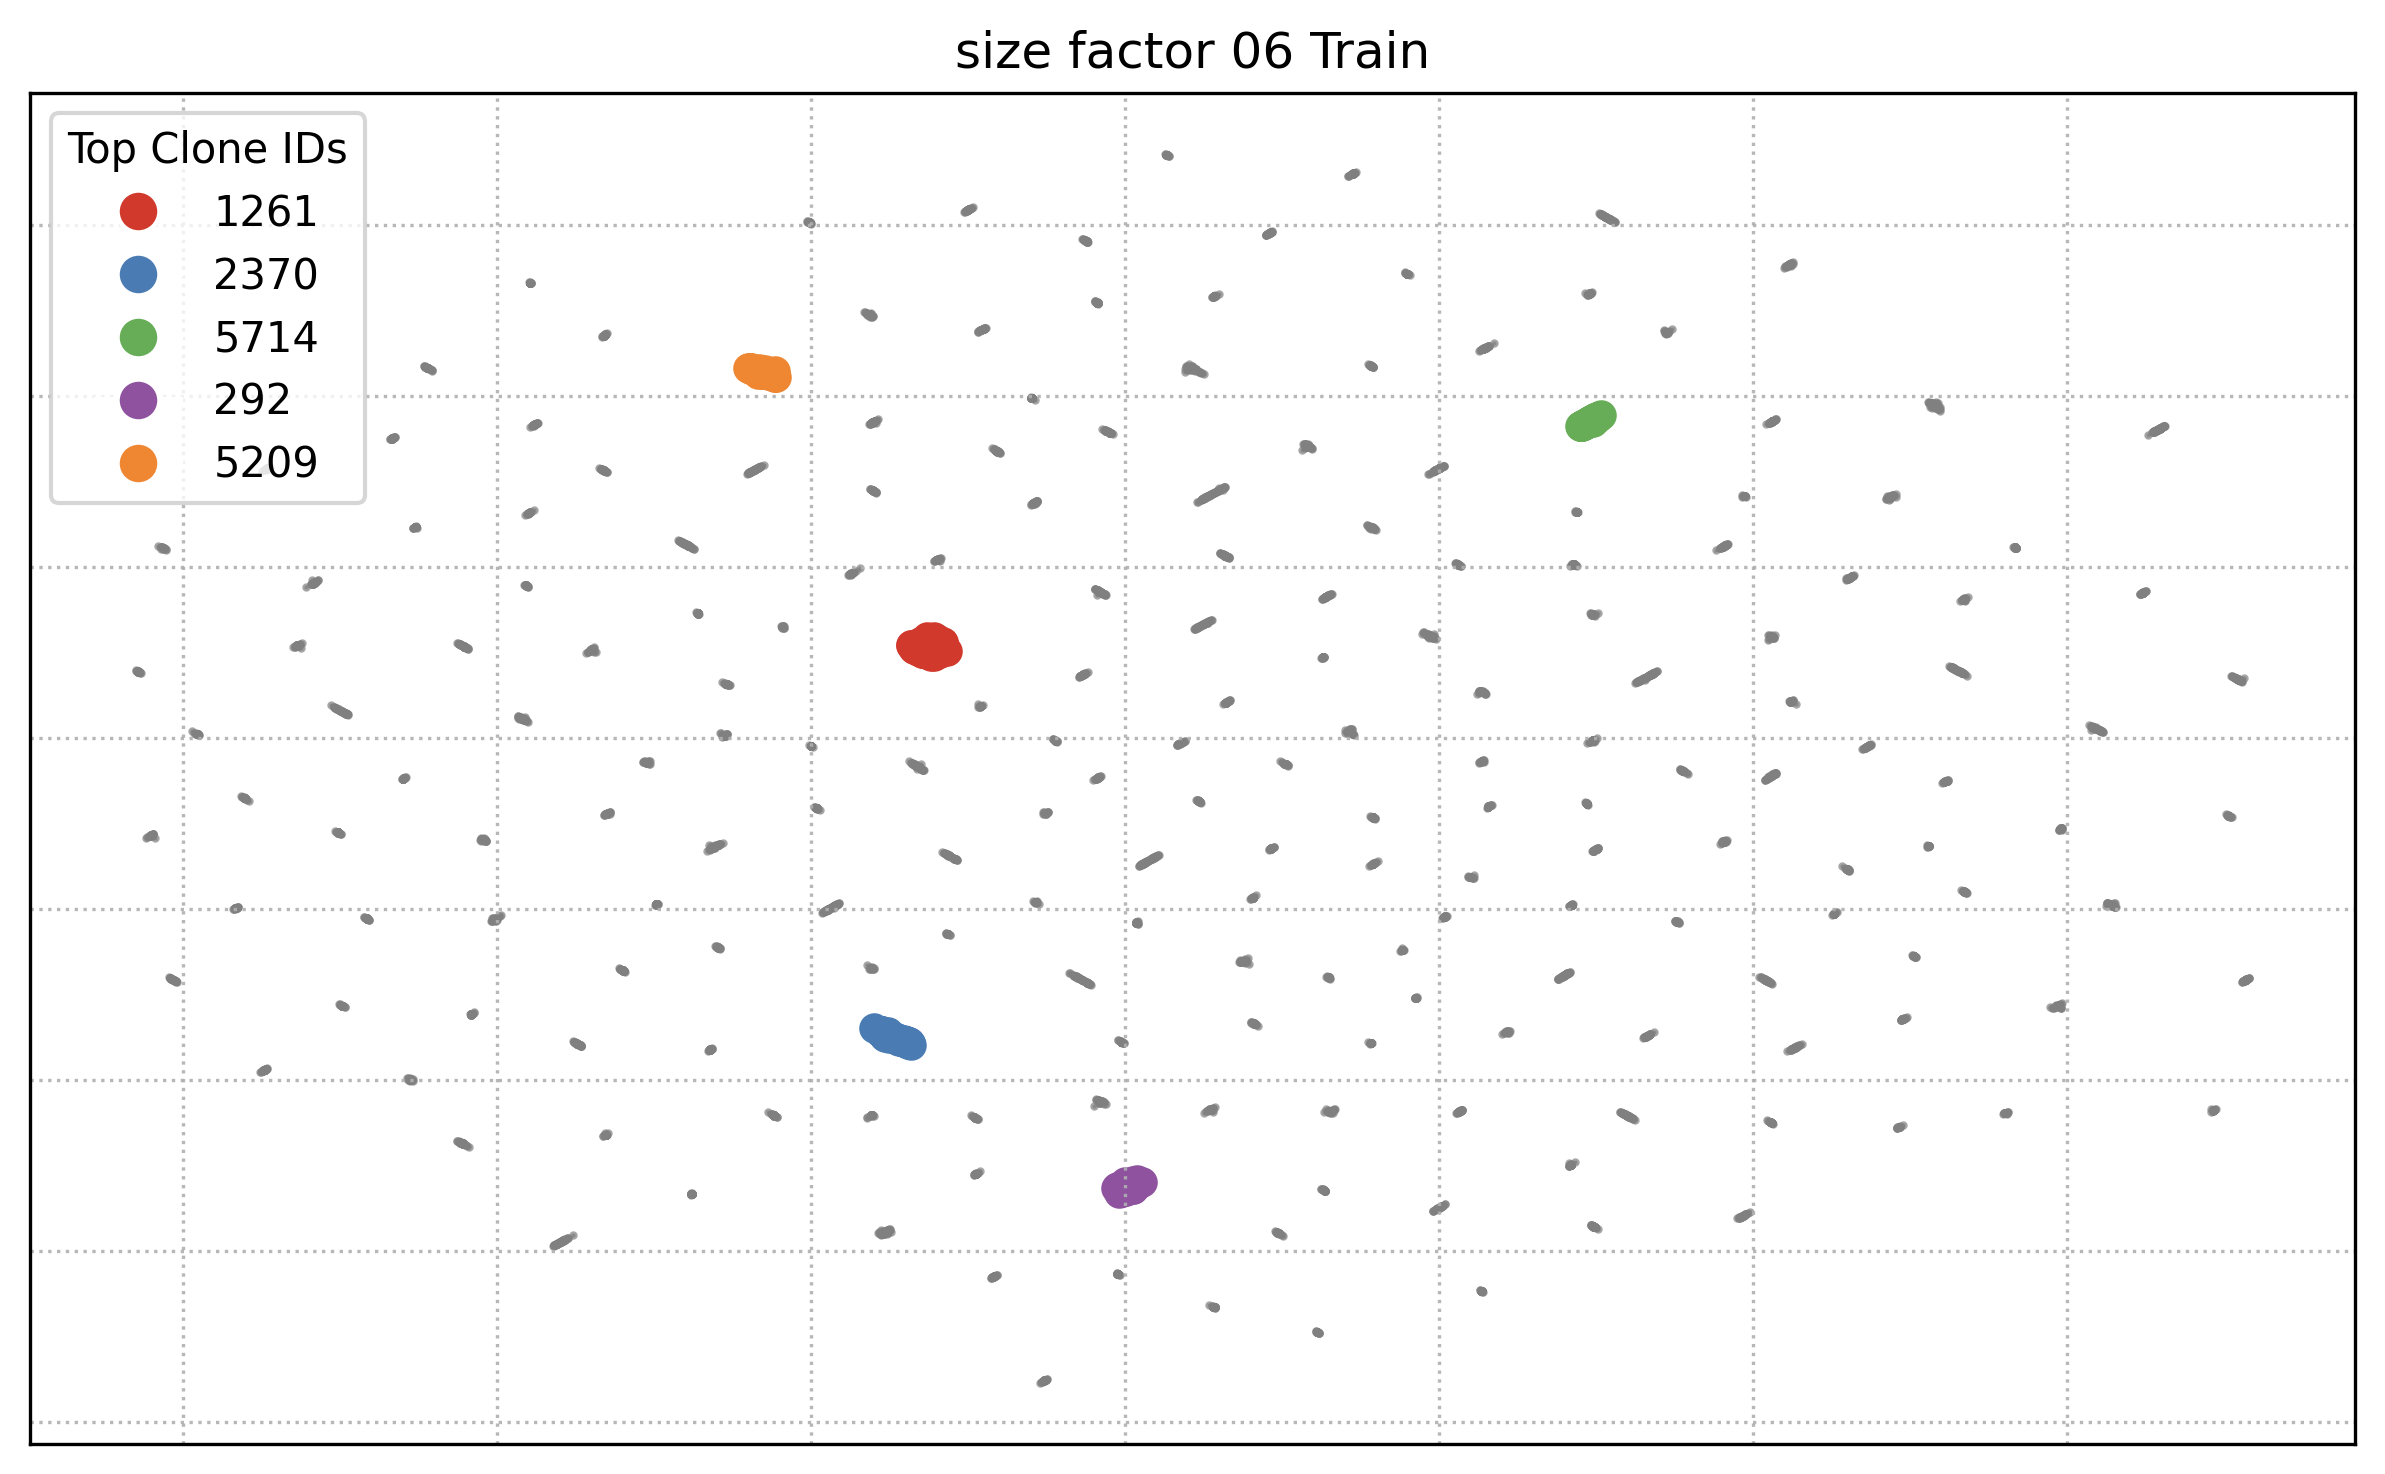

Calinski-Harabasz Score: 45214.282087935724
KNN classifier training accuracy: 100.00%


1.0

In [6]:
eval_06_train = LCL_eval.Eval(train_06, adata_train)
eval_06_train.plot_umap_top_lin("size factor 06 Train")
score_06_train = eval_06_train.calculate_calinski_harabasz_score()
eval_06_train.KNN_train()


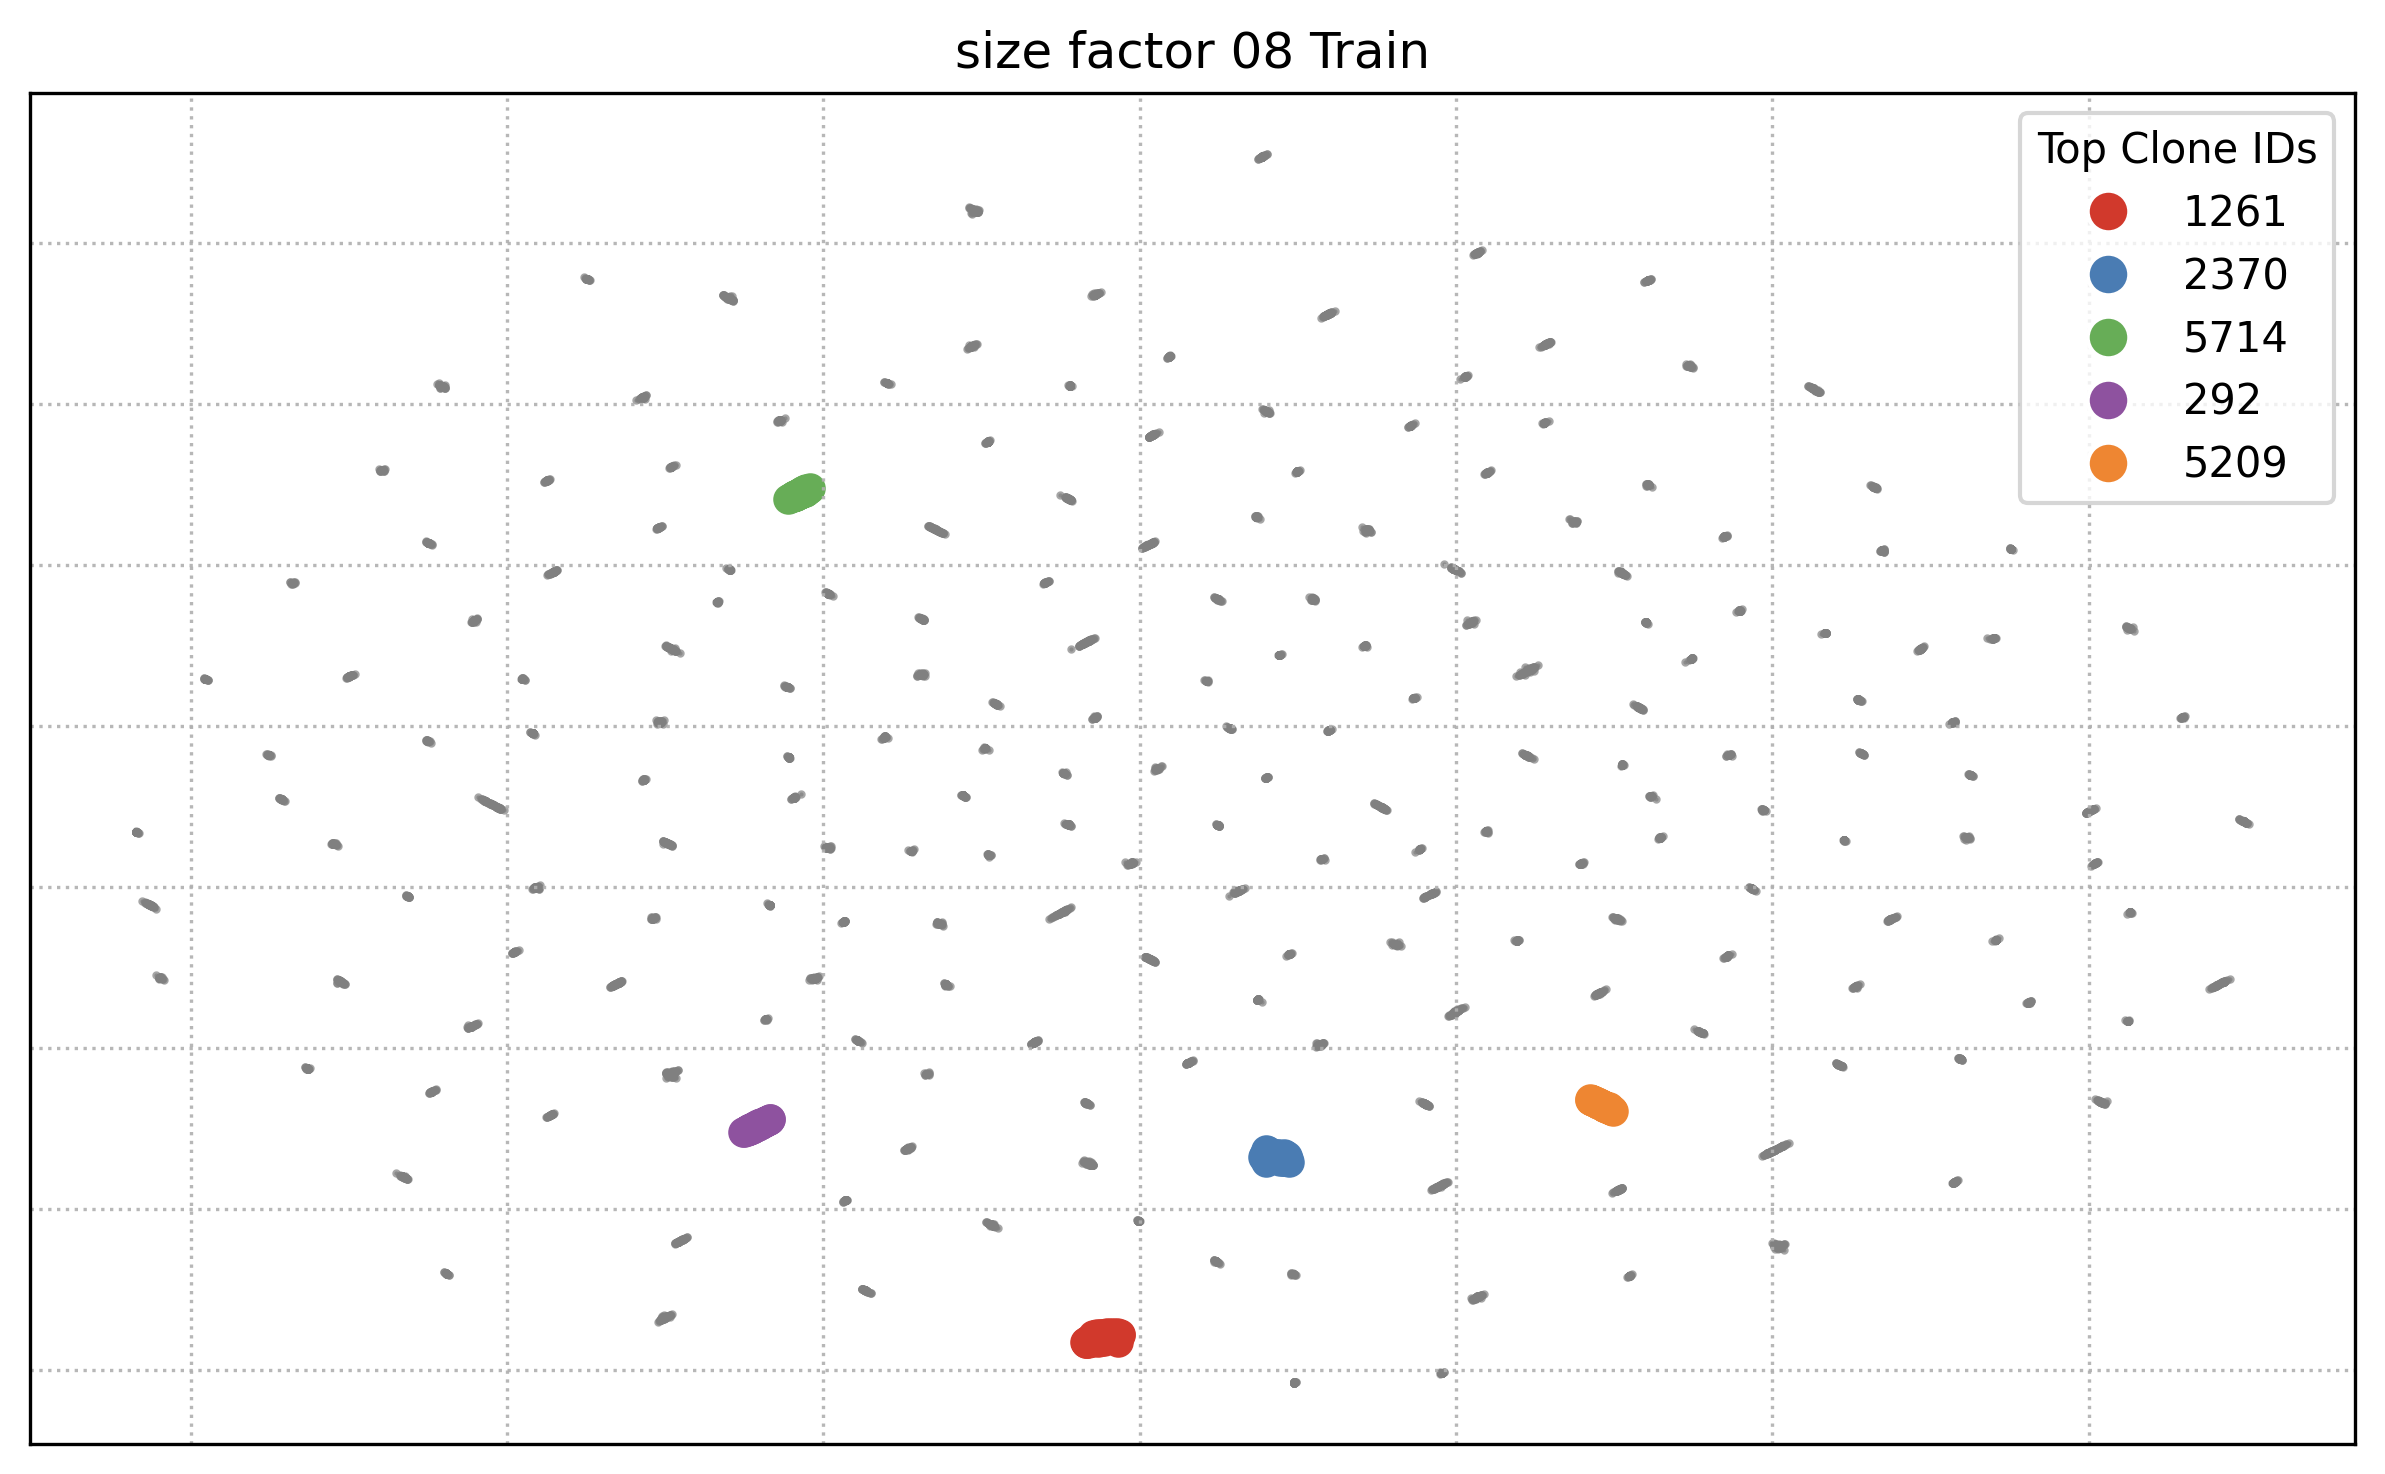

Calinski-Harabasz Score: 58473.17459121189
KNN classifier training accuracy: 100.00%


1.0

In [7]:
eval_08_train = LCL_eval.Eval(train_08, adata_train)
eval_08_train.plot_umap_top_lin("size factor 08 Train")
score_08_train = eval_08_train.calculate_calinski_harabasz_score()
eval_08_train.KNN_train()

### Test

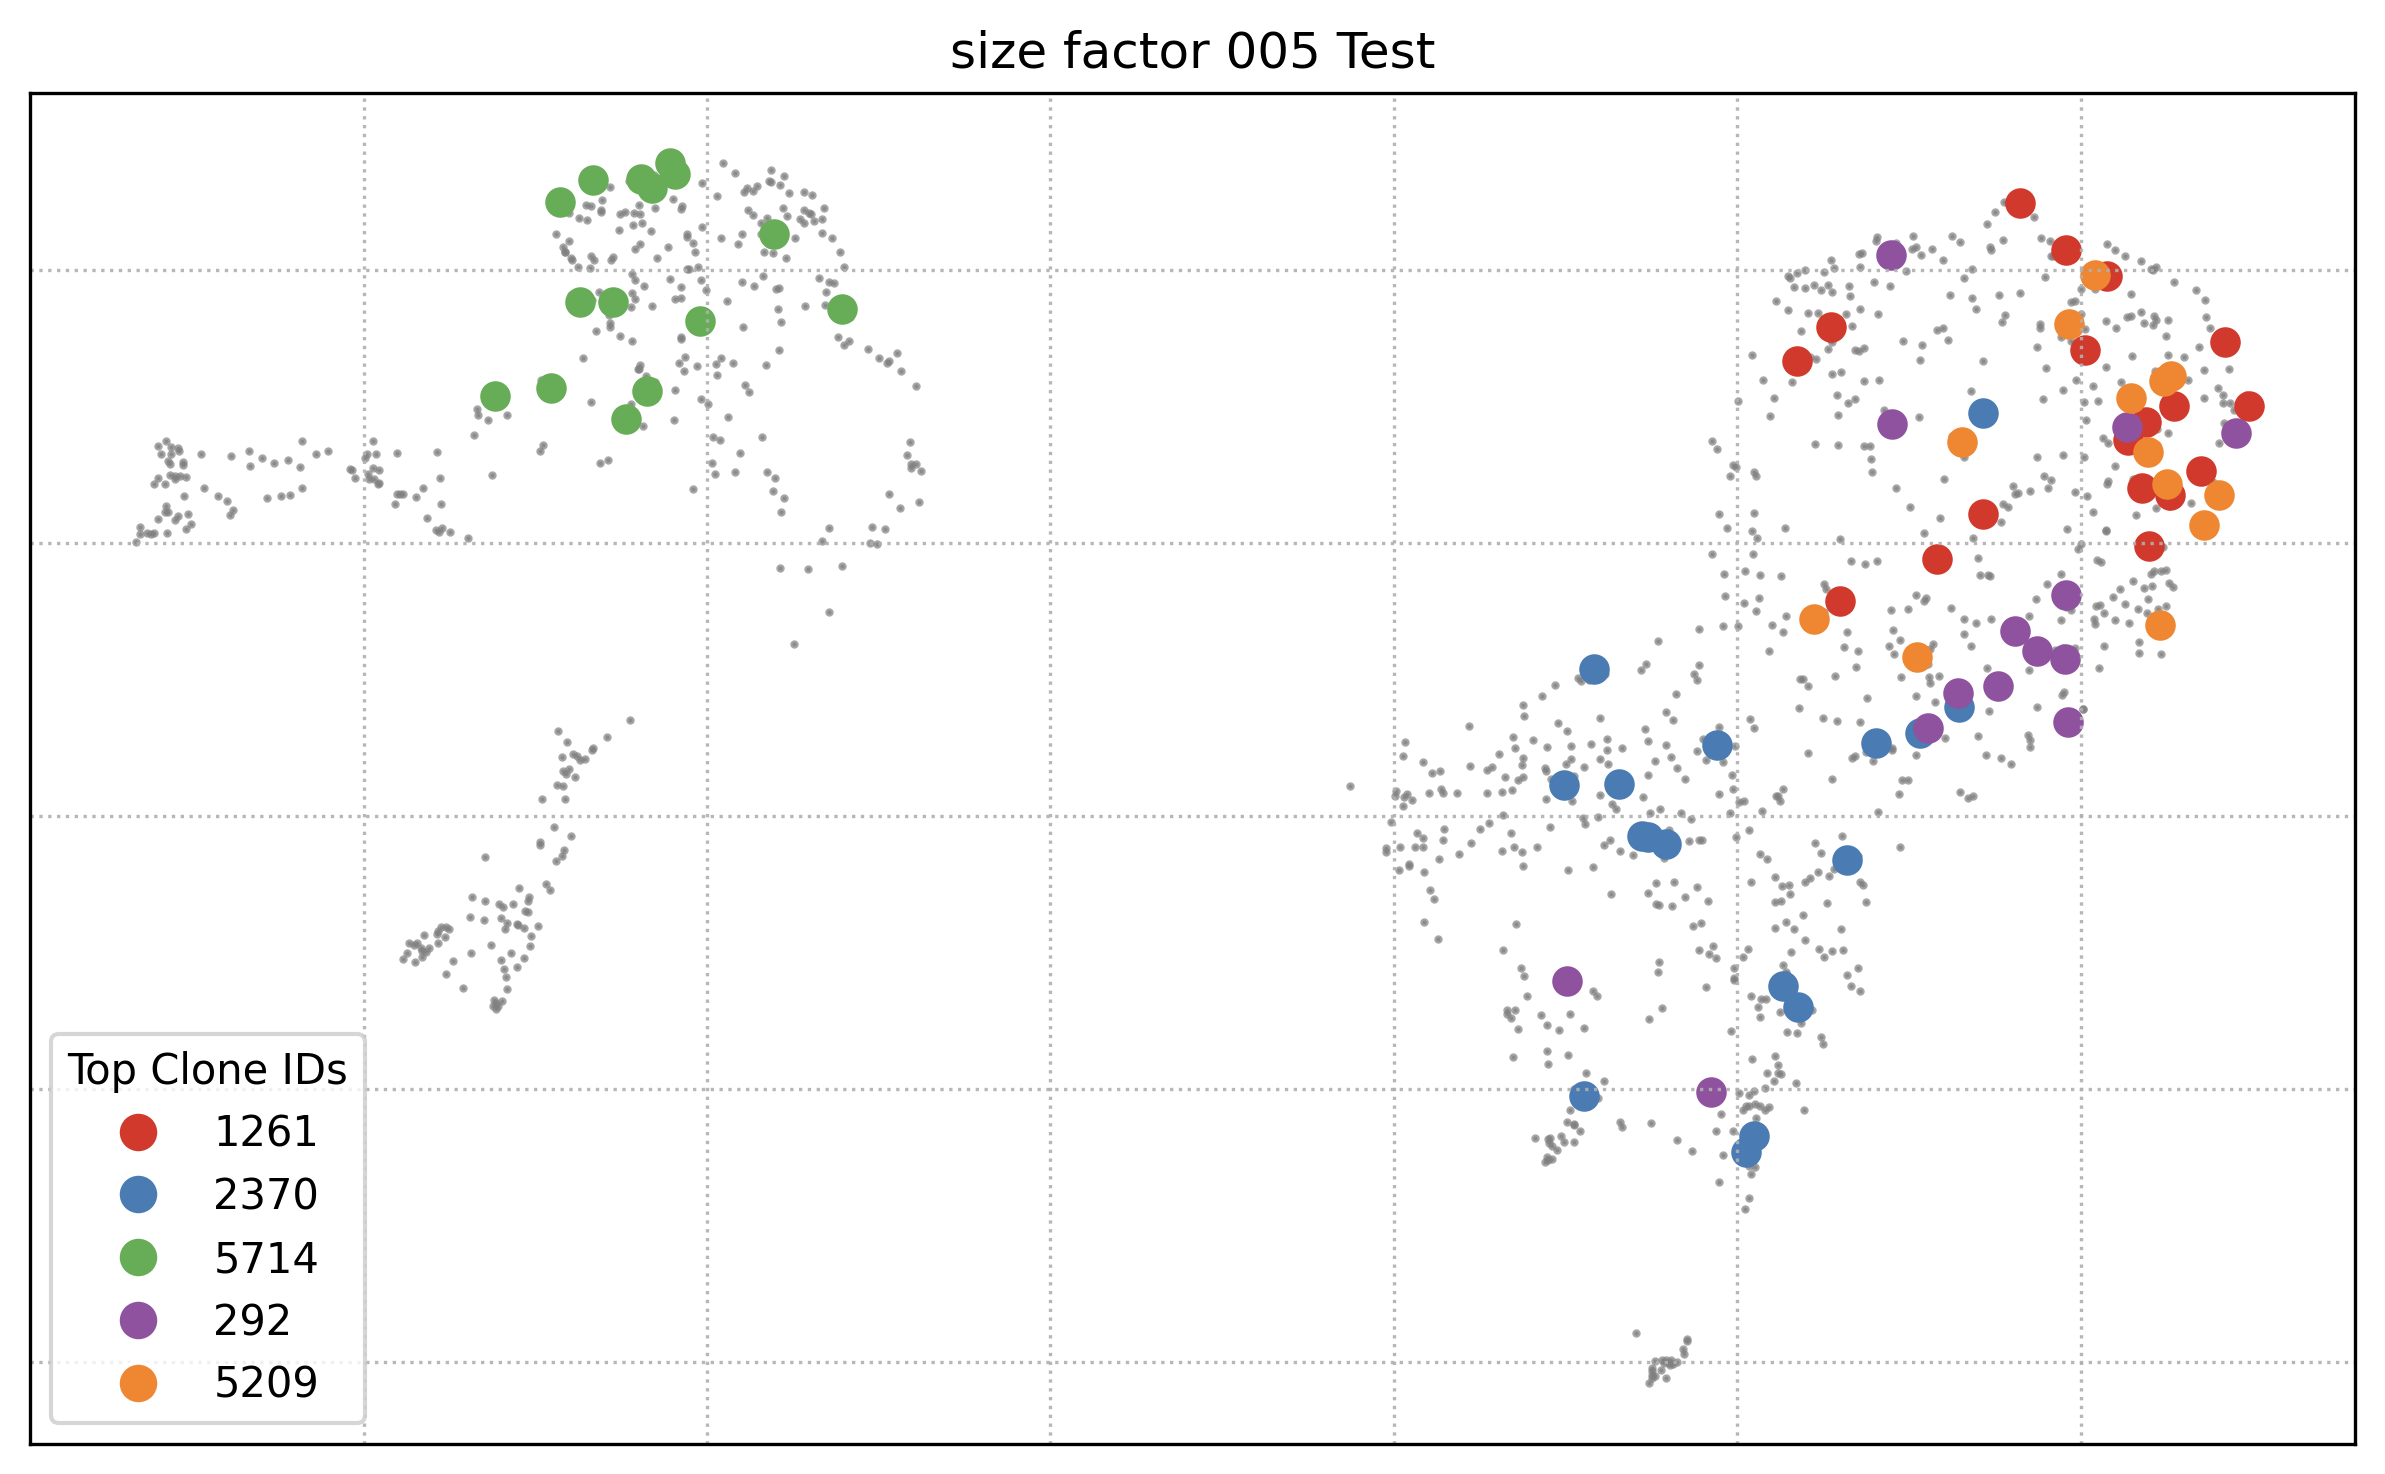

Calinski-Harabasz Score: 8.60661539454232
KNN classifier testing accuracy: 13.47%


0.1346938775510204

In [15]:
eval_005_test = LCL_eval.Eval(test_005, adata_test)
eval_005_test.plot_umap_top_lin("size factor 005 Test")
score_005_test = eval_005_test.calculate_calinski_harabasz_score()
eval_005_train.KNN_test(test_005, adata_test)

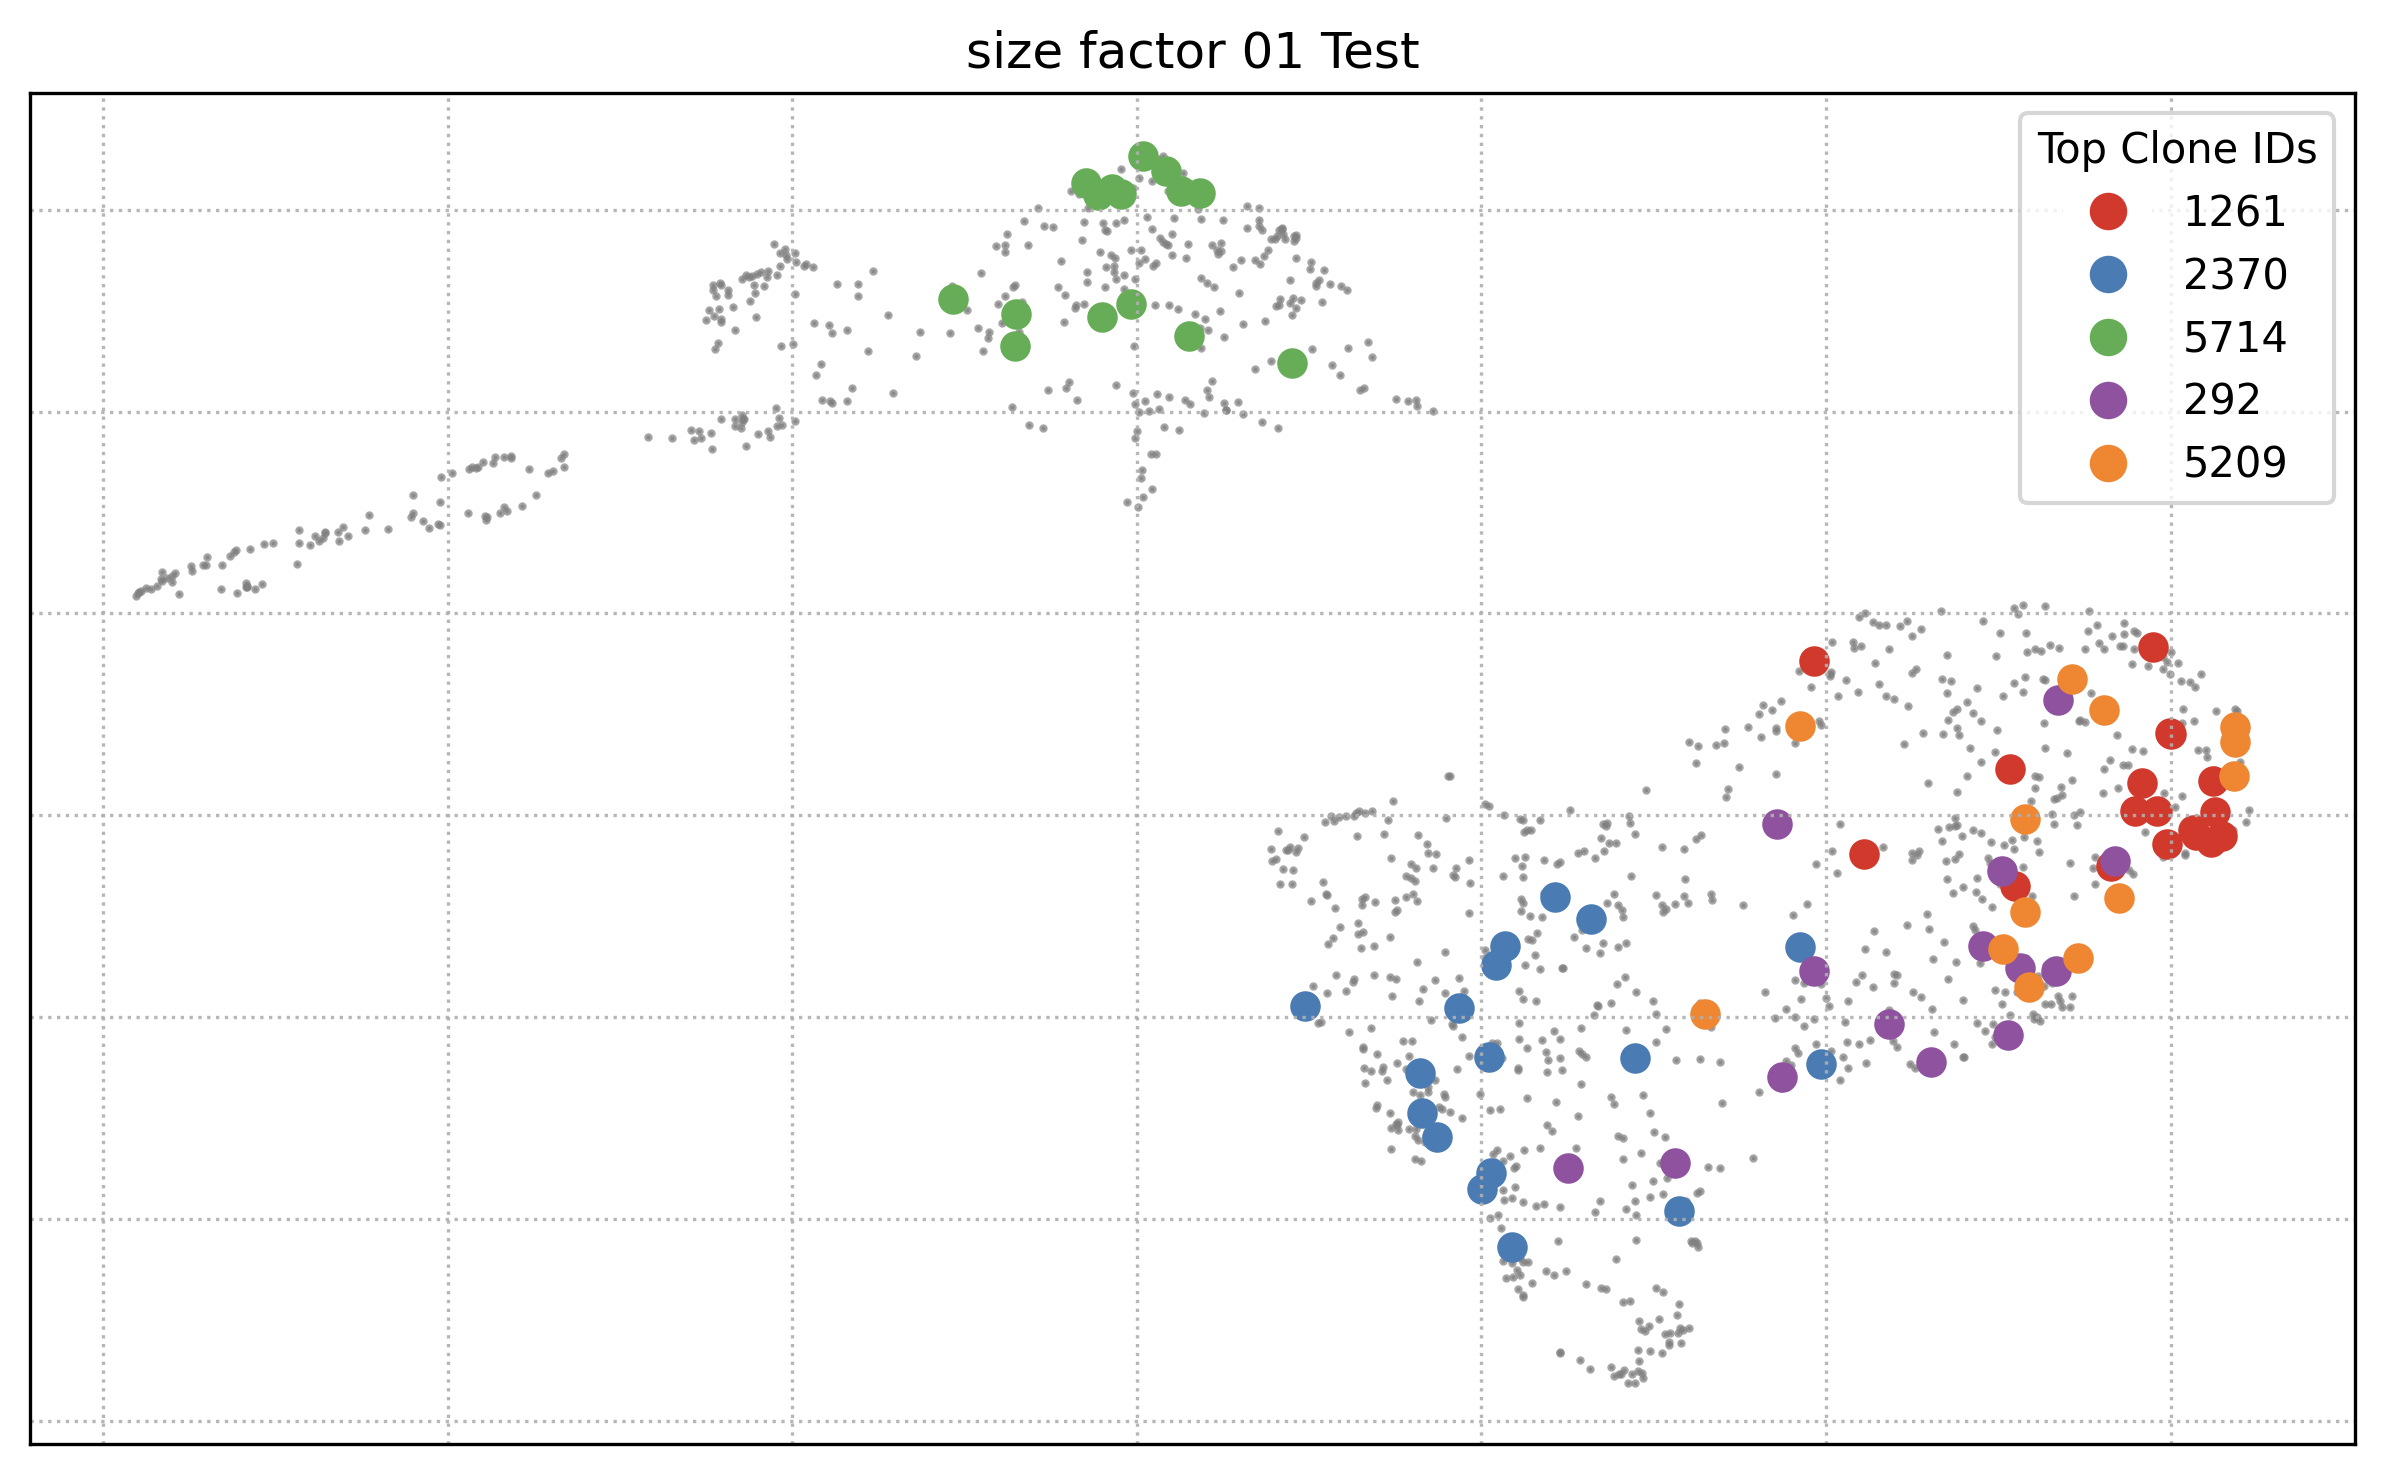

Calinski-Harabasz Score: 10.839193040246684
KNN classifier testing accuracy: 12.98%


0.12979591836734694

In [16]:
eval_01_test = LCL_eval.Eval(test_01, adata_test)
eval_01_test.plot_umap_top_lin("size factor 01 Test")
score_01_test = eval_01_test.calculate_calinski_harabasz_score()
eval_01_train.KNN_test(test_01, adata_test)

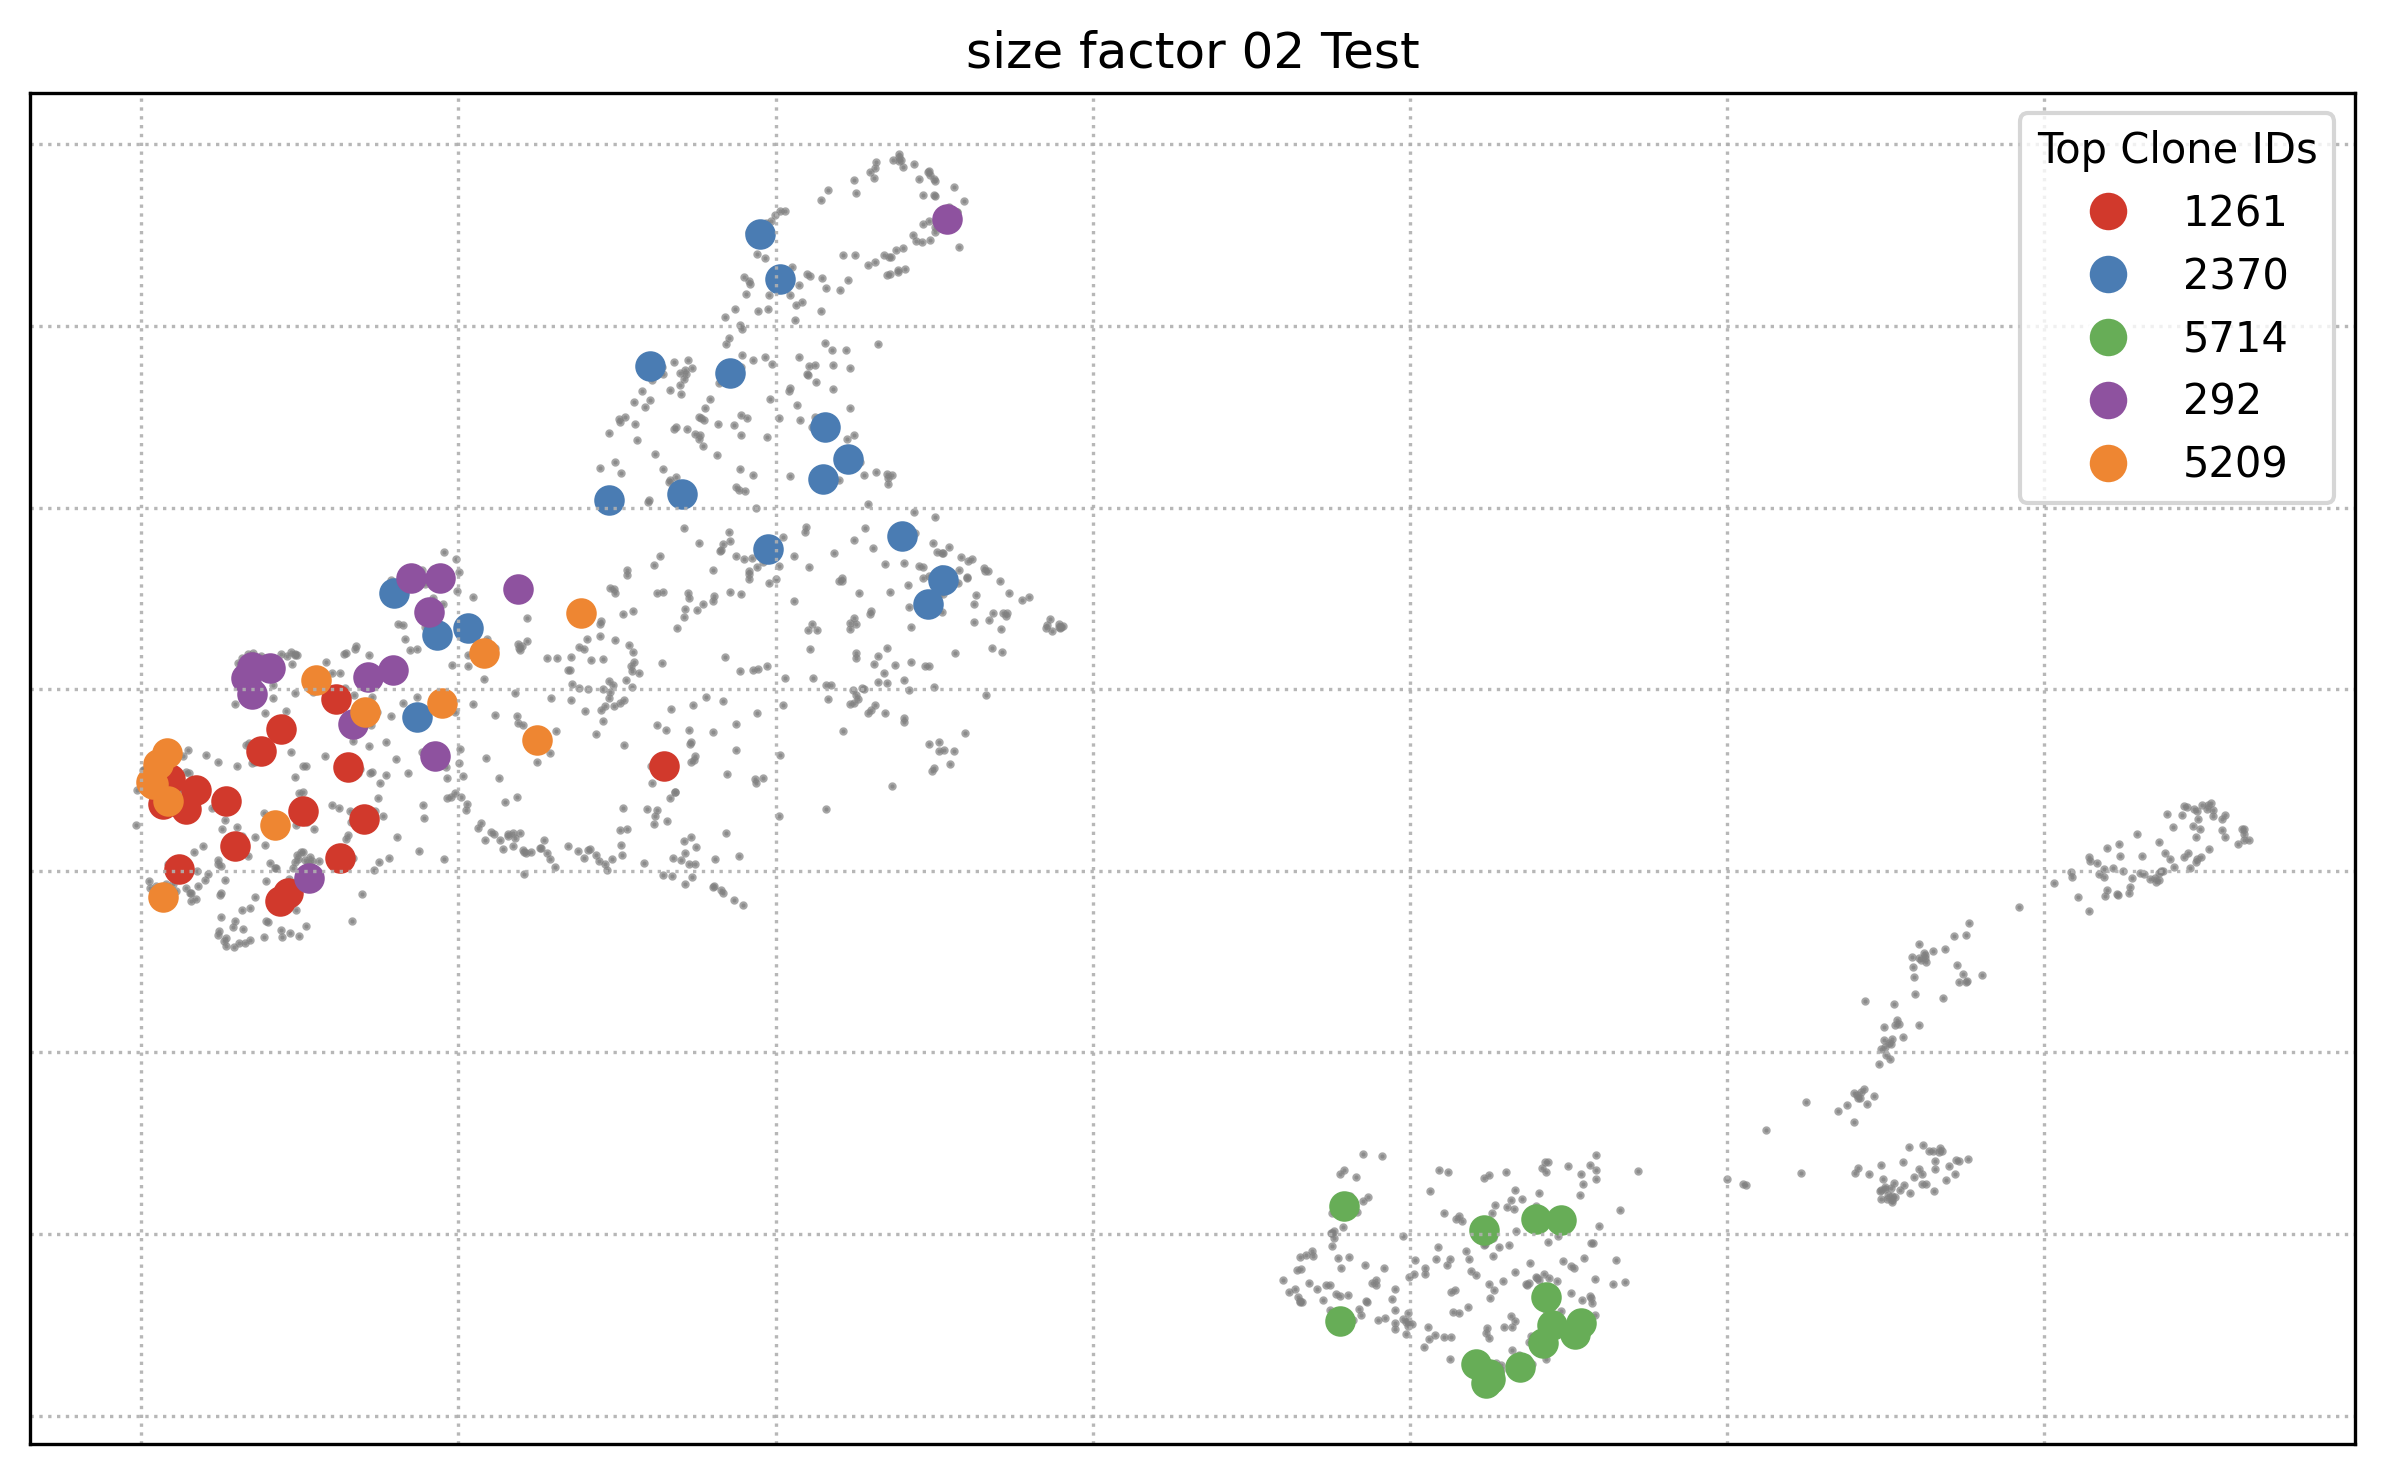

Calinski-Harabasz Score: 10.811593461304446
KNN classifier testing accuracy: 13.06%


0.1306122448979592

In [ ]:
eval_02_test = LCL_eval.Eval(test_02, adata_test)
eval_02_test.plot_umap_top_lin("size factor 02 Test")
score_02_test = eval_02_test.calculate_calinski_harabasz_score()
eval_02_train.KNN_test(test_02, adata_test)

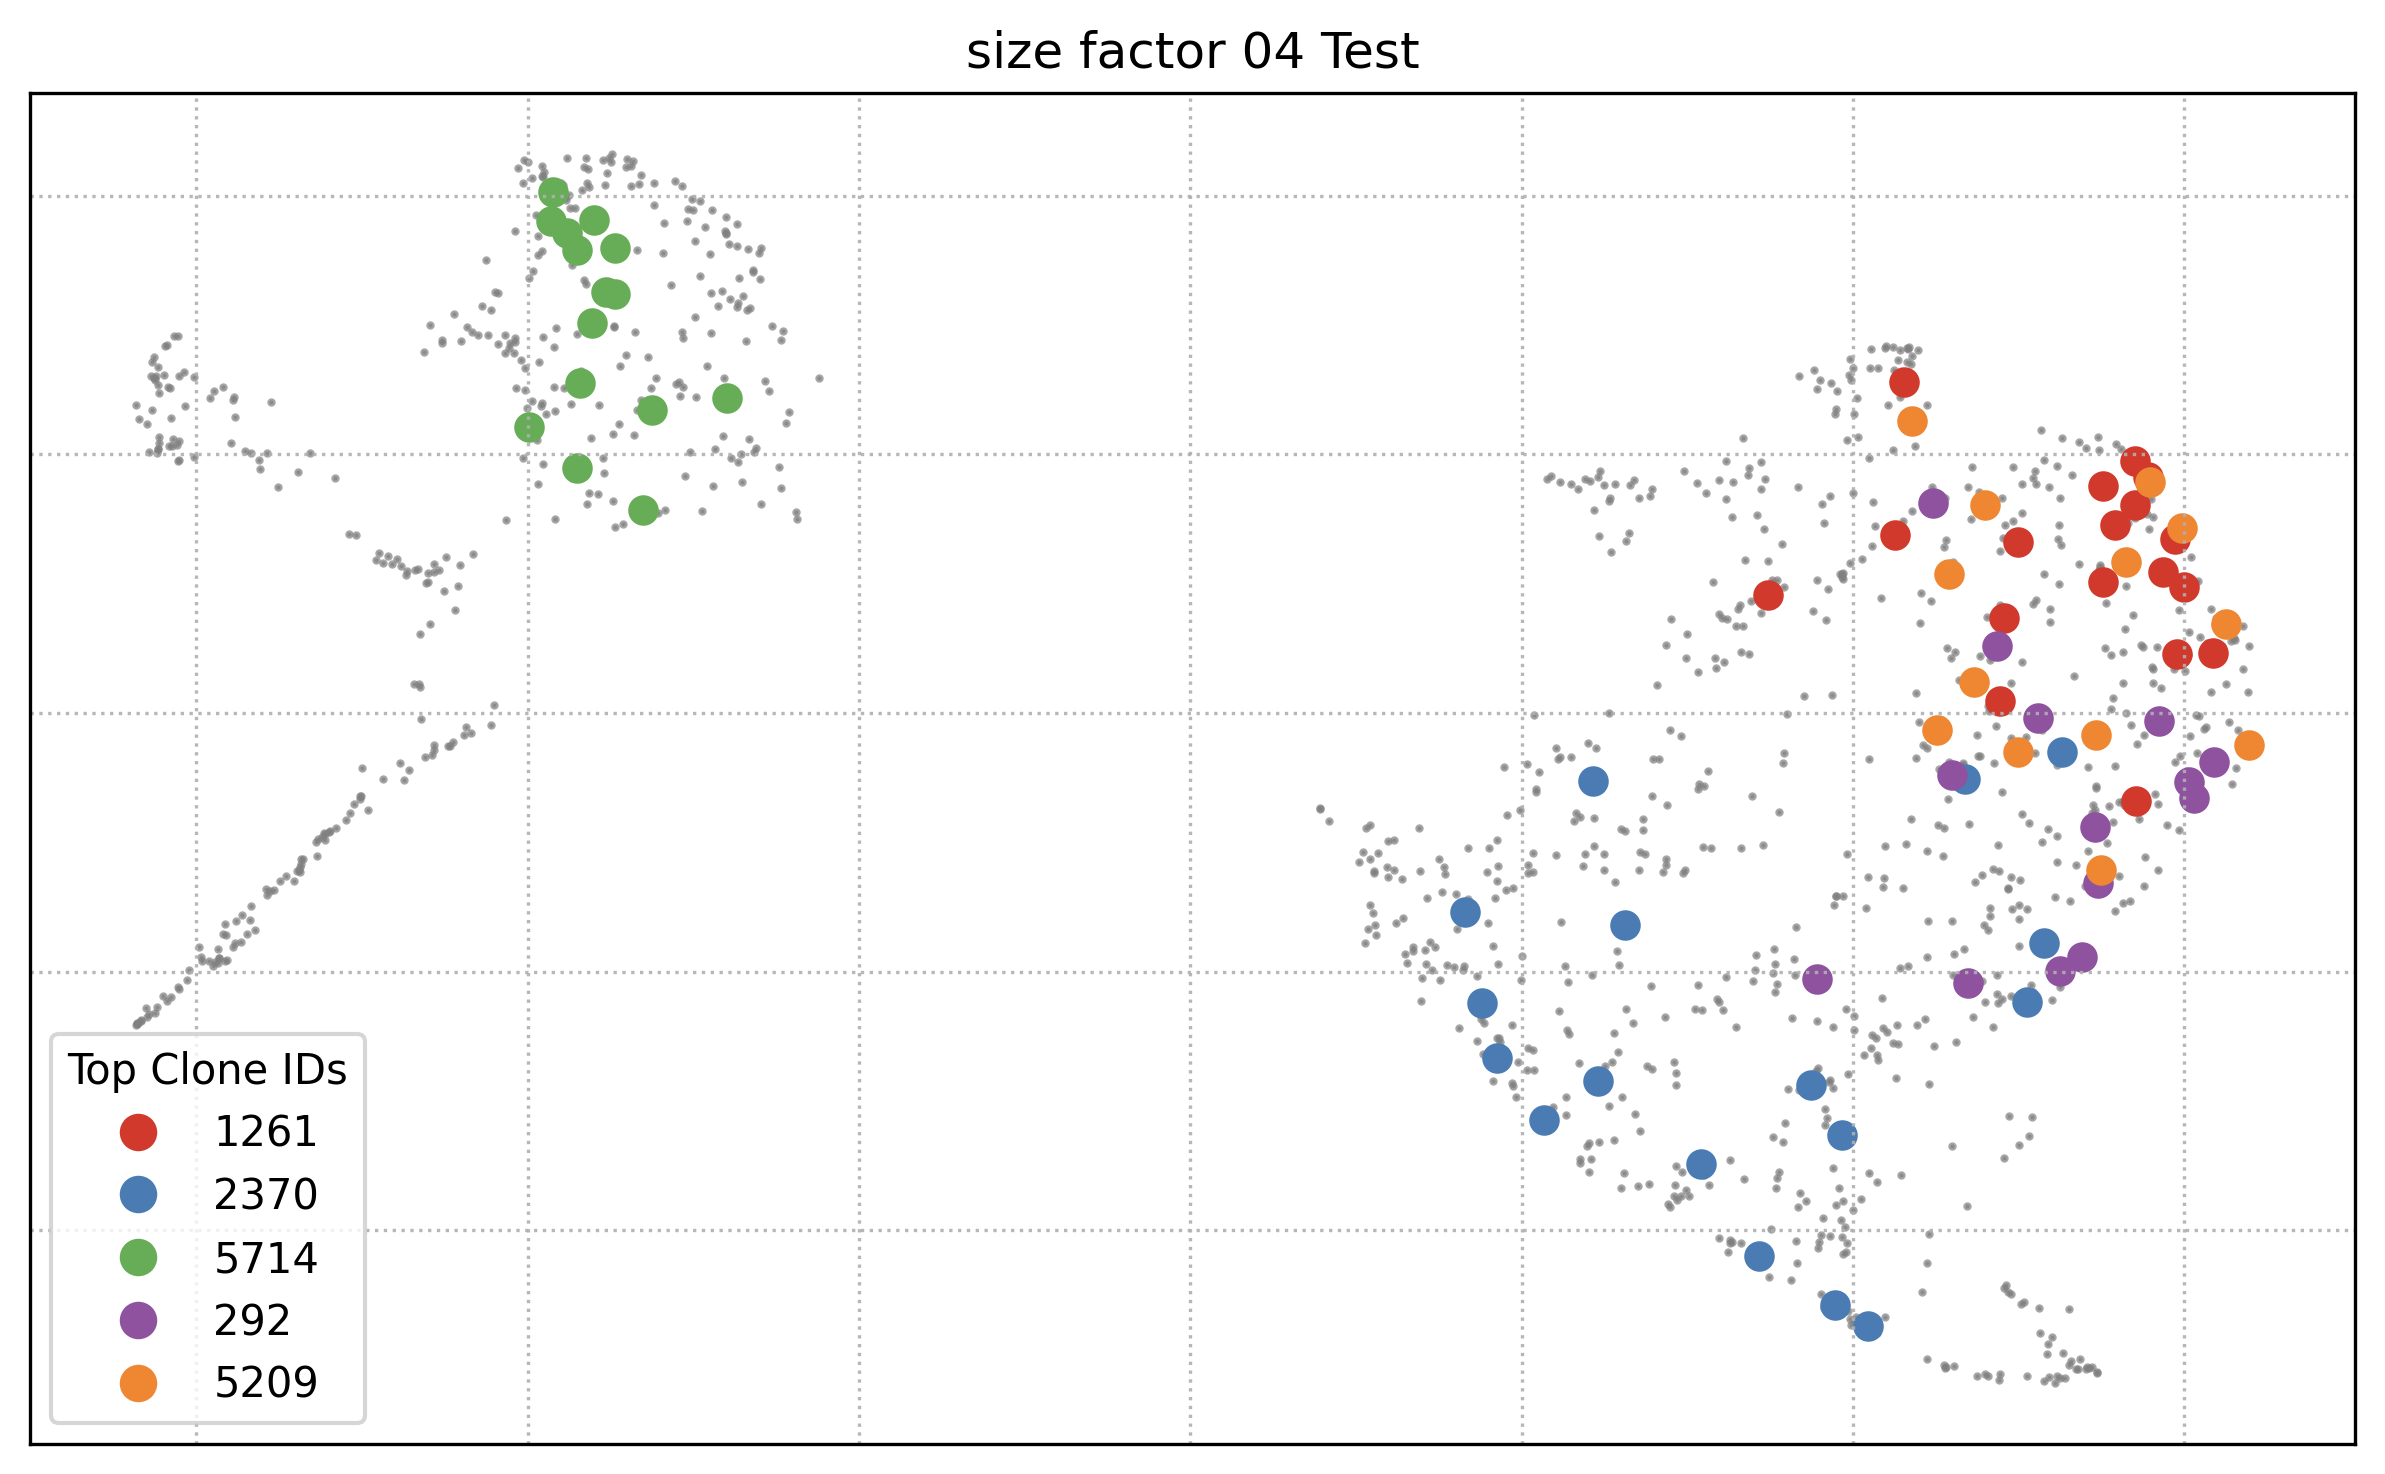

Calinski-Harabasz Score: 10.372006073807386
KNN classifier testing accuracy: 13.80%


0.13795918367346938

In [9]:
eval_04_test = LCL_eval.Eval(test_04, adata_test)
eval_04_test.plot_umap_top_lin("size factor 04 Test")
score_04_test = eval_04_test.calculate_calinski_harabasz_score()
eval_04_train.KNN_test(test_04, adata_test)

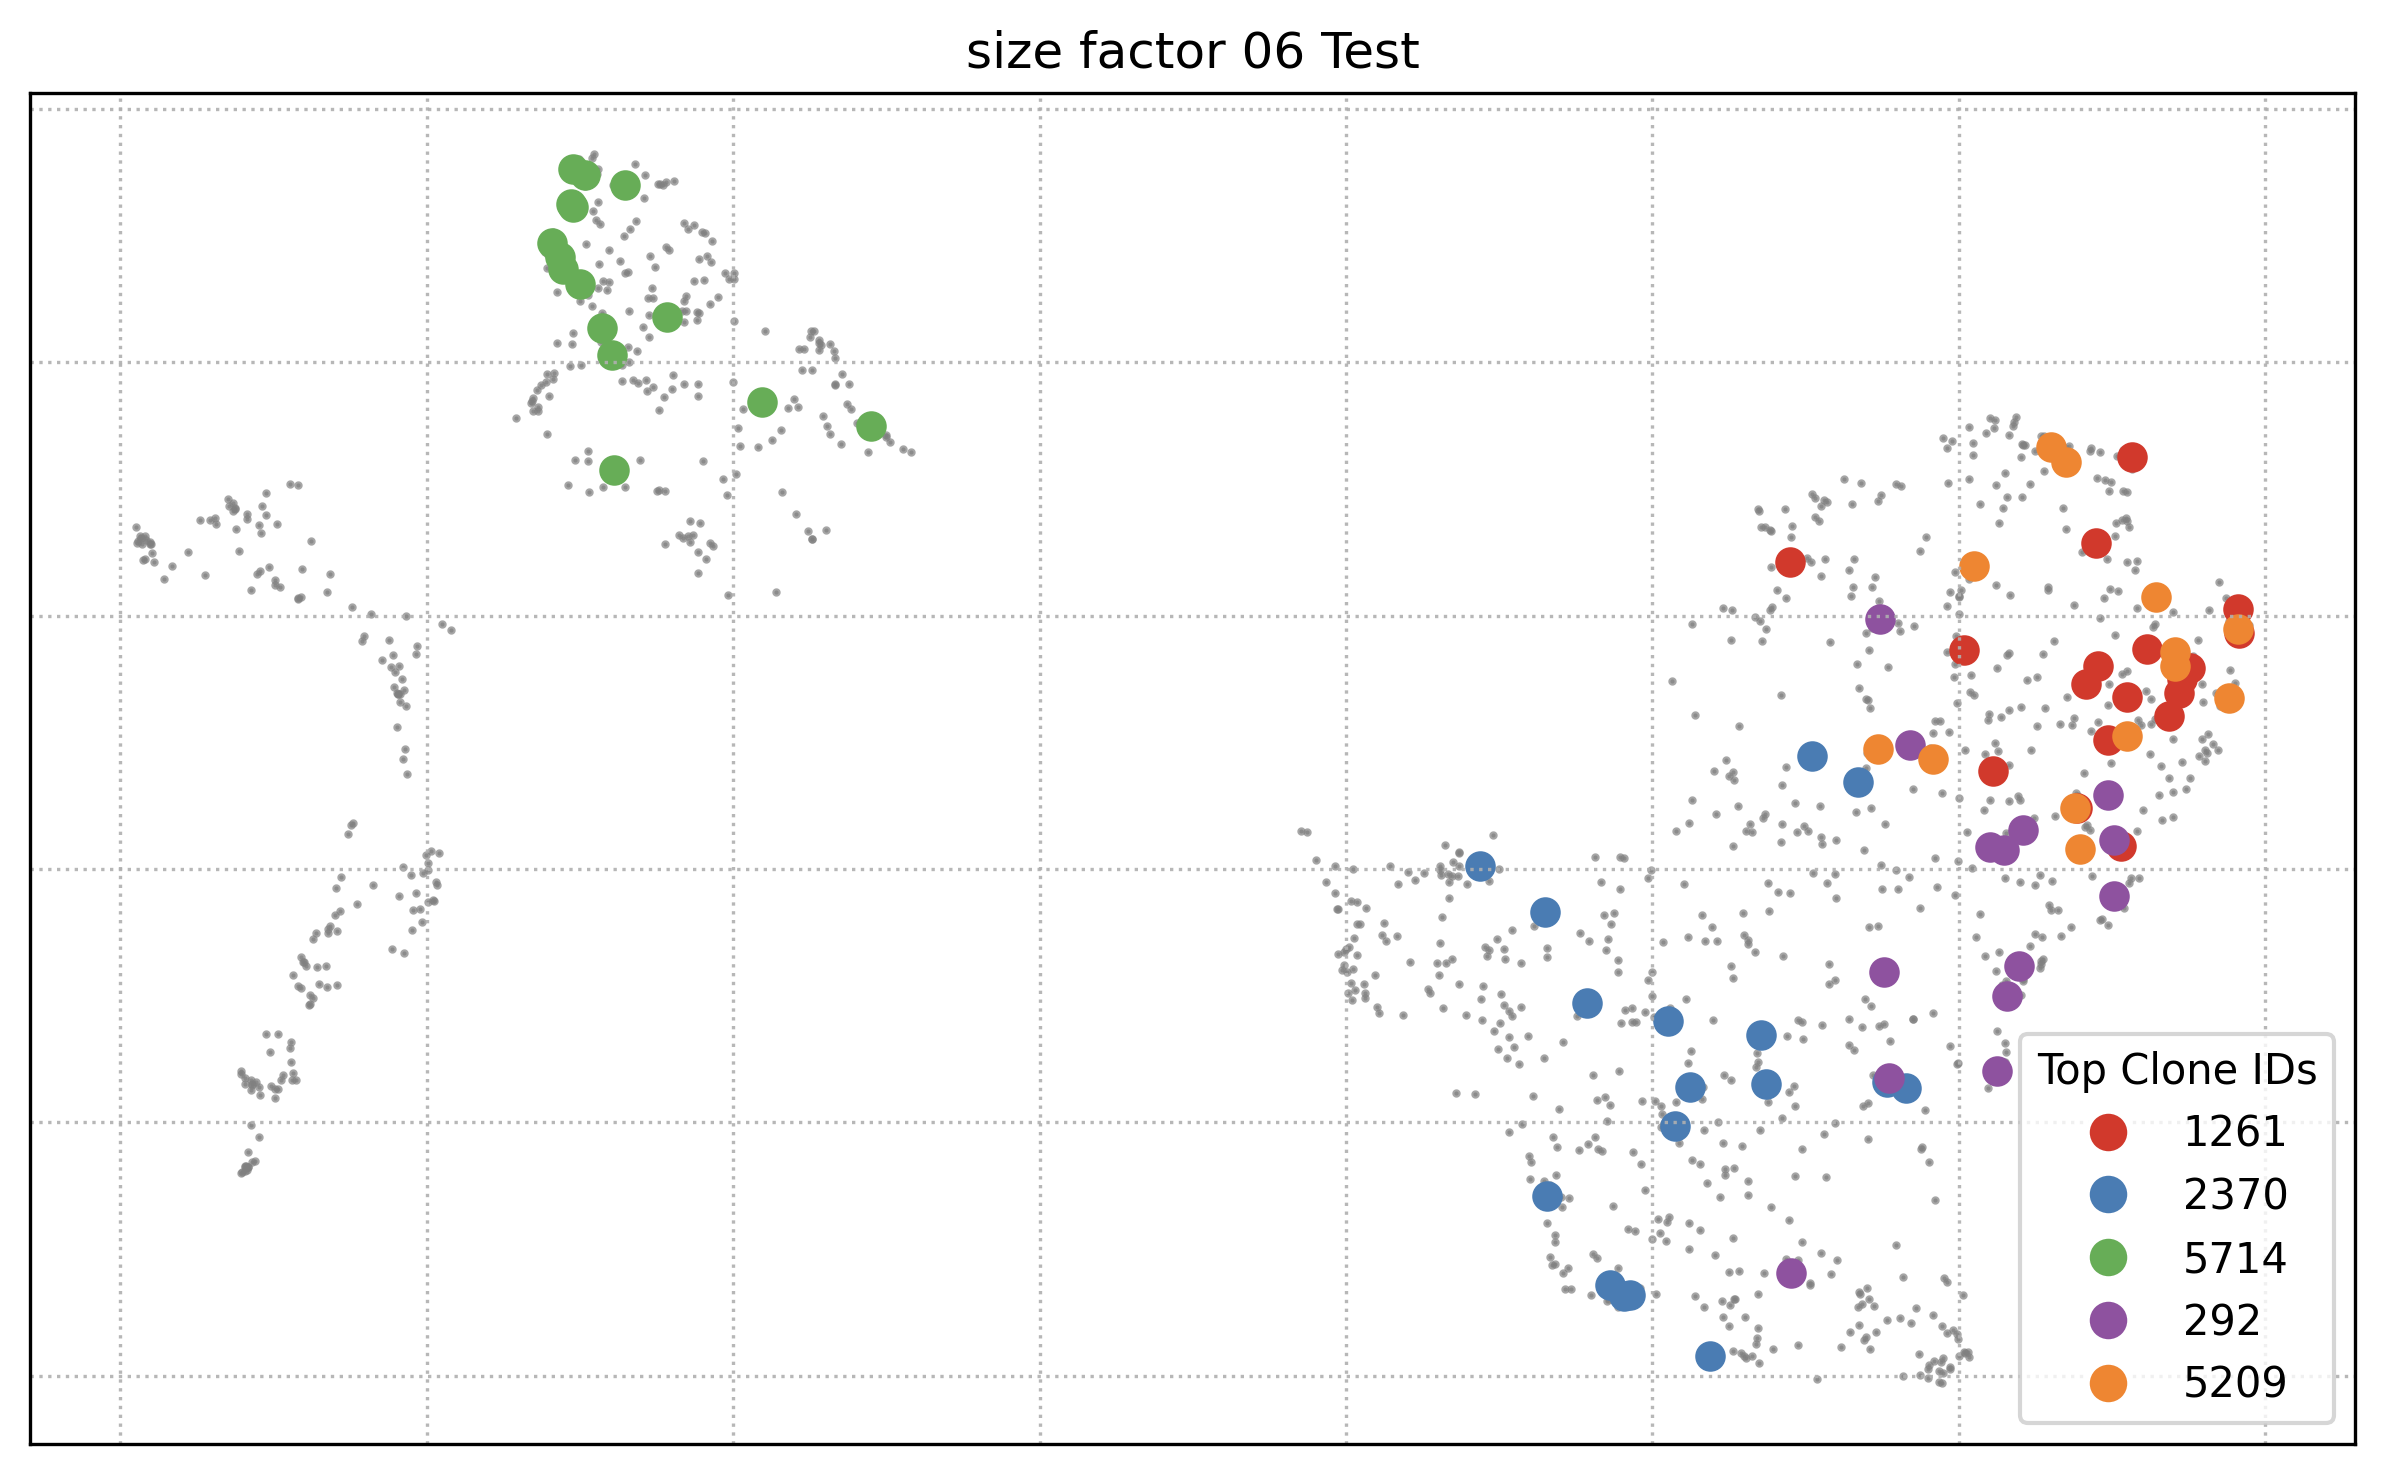

Calinski-Harabasz Score: 9.717956554302148
KNN classifier testing accuracy: 12.82%


0.12816326530612246

In [10]:
eval_06_test = LCL_eval.Eval(test_06, adata_test)
eval_06_test.plot_umap_top_lin("size factor 06 Test")
score_06_test = eval_06_test.calculate_calinski_harabasz_score()
eval_06_train.KNN_test(test_06, adata_test)

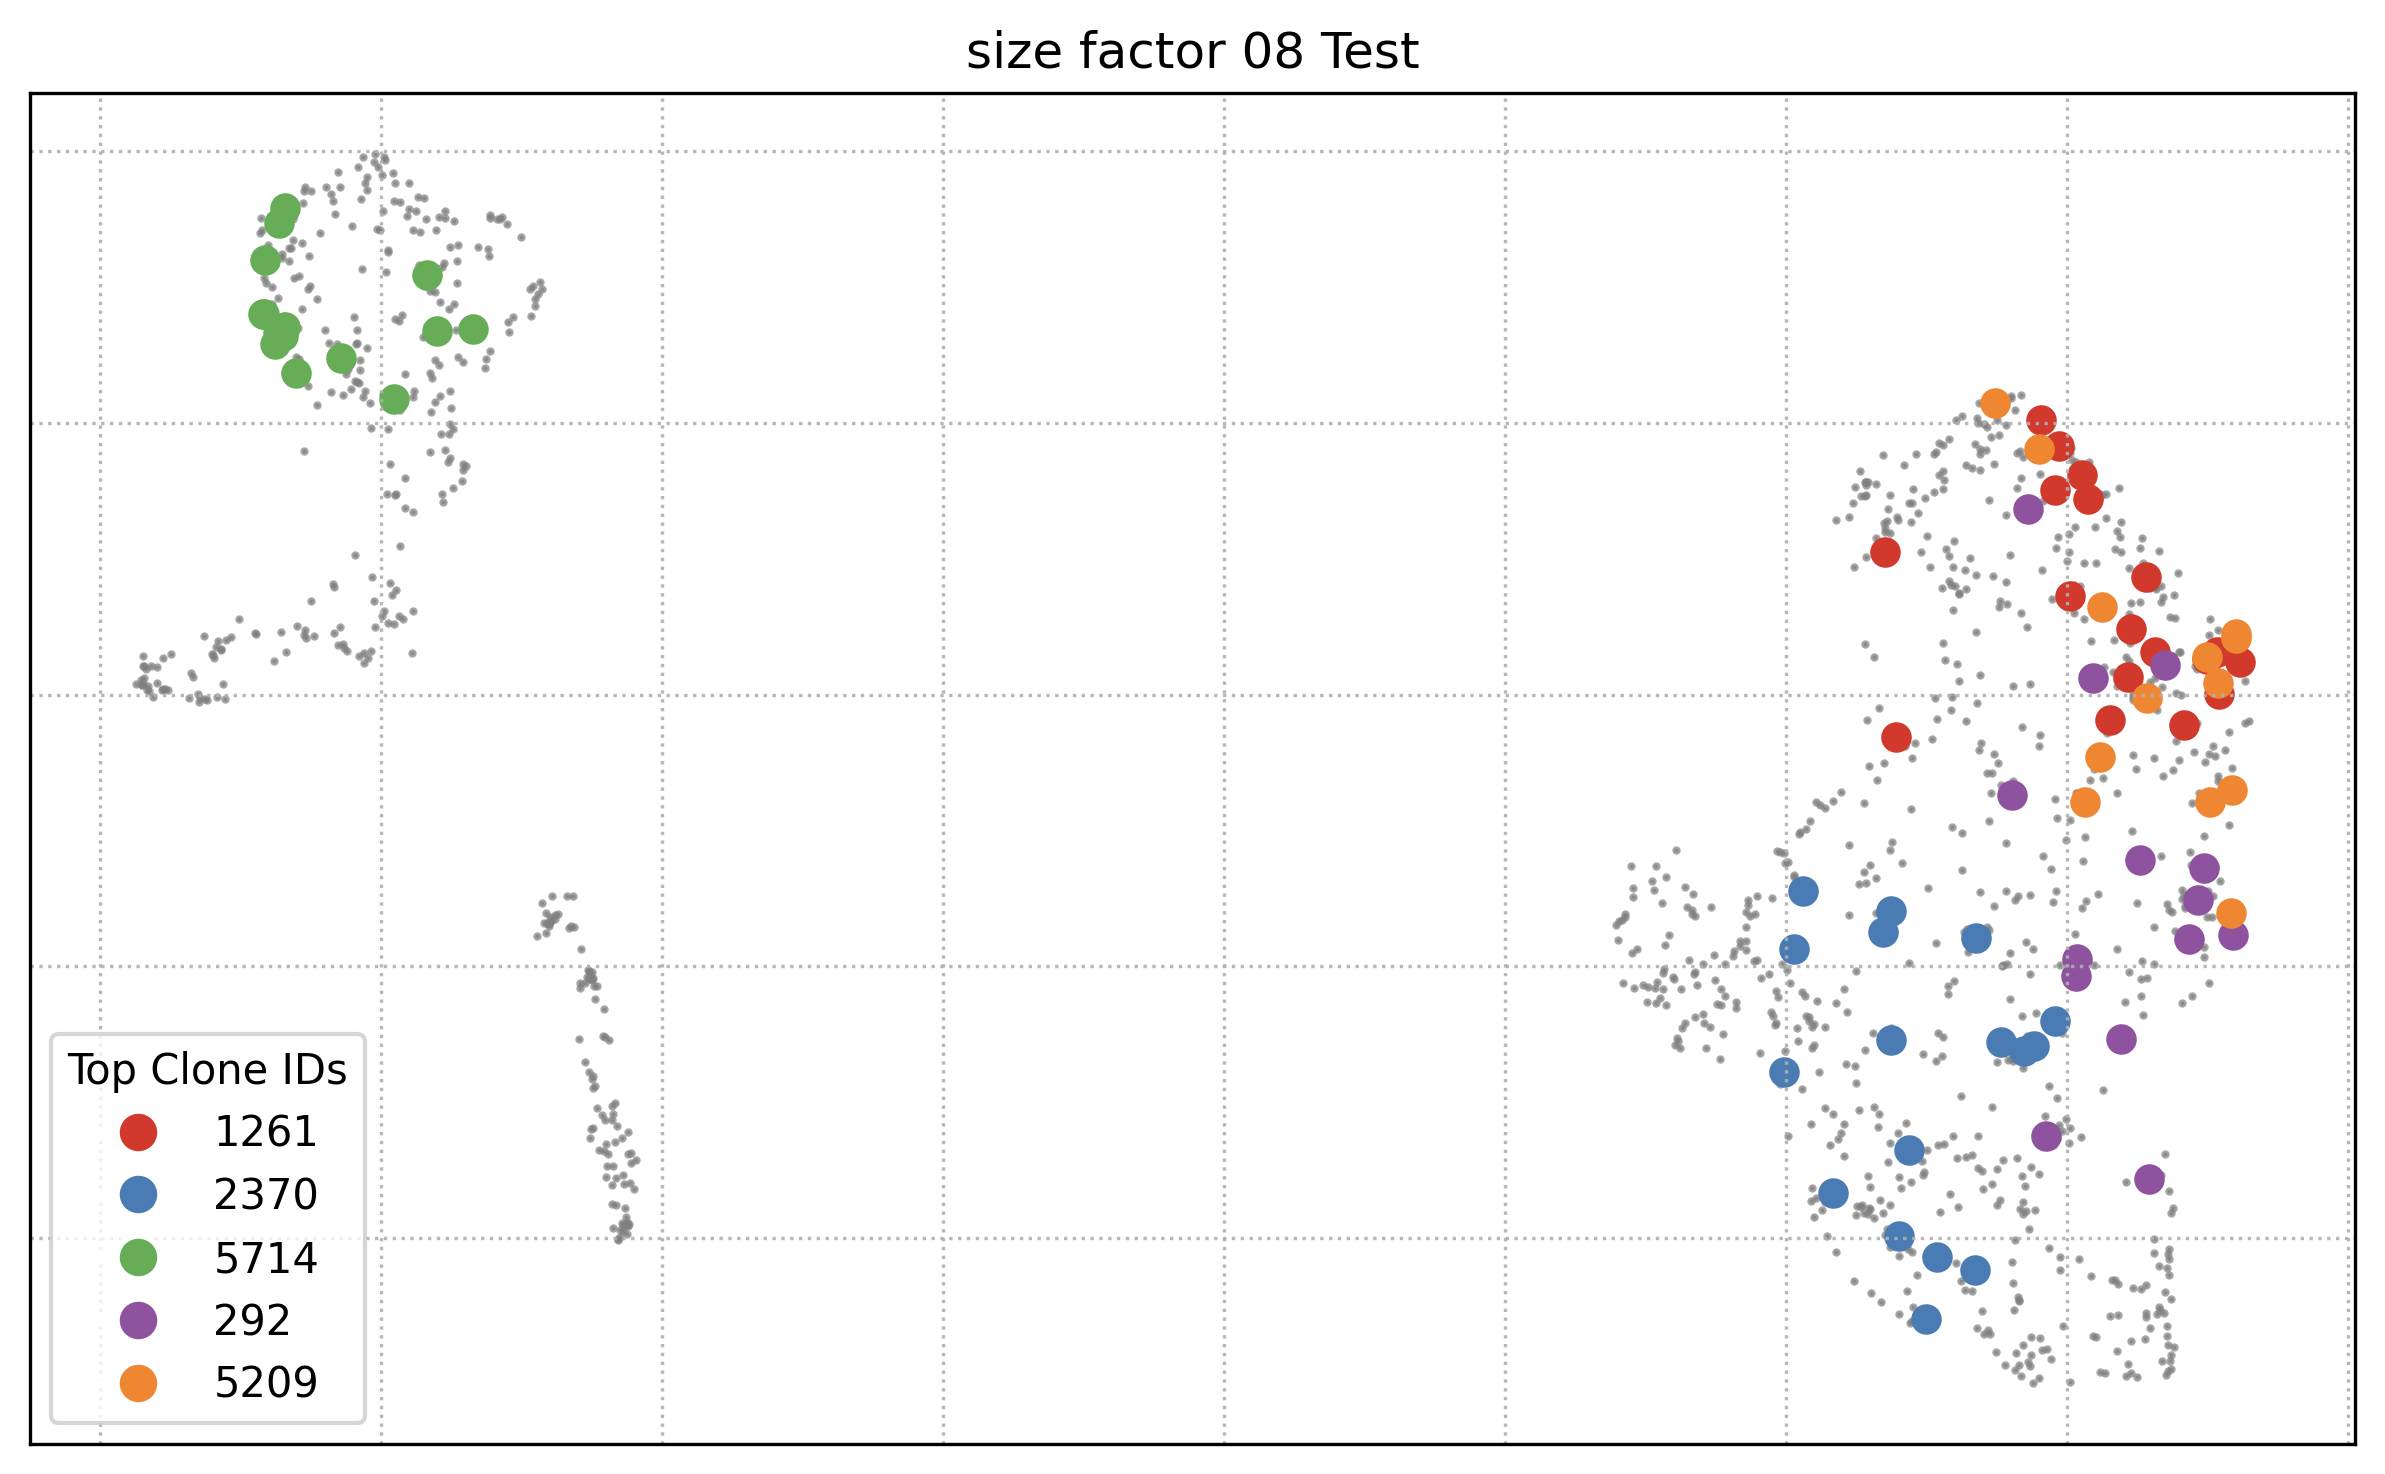

Calinski-Harabasz Score: 9.776468592903628
KNN classifier testing accuracy: 12.57%


0.12571428571428572

In [11]:
eval_08_test = LCL_eval.Eval(test_08, adata_test)
eval_08_test.plot_umap_top_lin("size factor 08 Test")
score_08_test = eval_08_test.calculate_calinski_harabasz_score()
eval_08_train.KNN_test(test_08, adata_test)

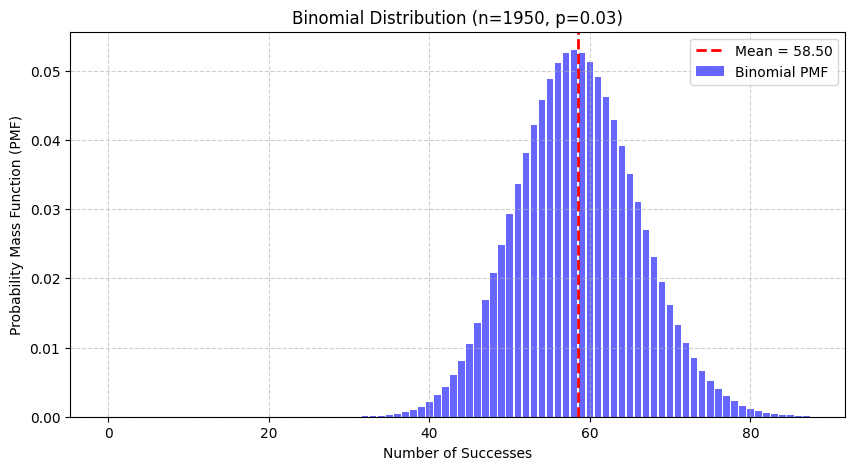

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
n = 1950
p = 0.03
mean = n * p

# Generate x values (range of possible successes)
x = np.arange(0, int(mean + 4 * np.sqrt(n * p * (1 - p))))  # Extend range for better visualization
y = stats.binom.pmf(x, n, p)

# Plot the binomial distribution
plt.figure(figsize=(10, 5))
plt.bar(x, y, color='blue', alpha=0.6, label='Binomial PMF')

# Mark the mean
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean:.2f}')

# Labels and title
plt.xlabel("Number of Successes")
plt.ylabel("Probability Mass Function (PMF)")
plt.title("Binomial Distribution (n=1950, p=0.03)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()